In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

DNot ='posNewTouchedData/-1,-1.csv'
D0_0 = 'posNewTouchedData/0,0.csv'
D0_3 = 'posNewTouchedData/0,3.csv'
D0_6 = 'posNewTouchedData/0,6.csv'
D0_7_5 = 'posNewTouchedData/0,7.5.csv'
D0_9 = 'posNewTouchedData/0,9.csv'
D0_12 = 'posNewTouchedData/0,12.csv'
D0_15 ='posNewTouchedData/0,15.csv'
D3_0 ='posNewTouchedData/3,0.csv'
D3_3 ='posNewTouchedData/3,3.csv'
D3_6 ='posNewTouchedData/3,6.csv'
D3_9 ='posNewTouchedData/3,9.csv'
D3_12 ='posNewTouchedData/3,12.csv'
D3_15 ='posNewTouchedData/3,15.csv'
D6_0 ='posNewTouchedData/6,0.csv'
D6_3 ='posNewTouchedData/6,3.csv'
D6_6 ='posNewTouchedData/6,6.csv'
D6_9 ='posNewTouchedData/6,9.csv'
D6_12 ='posNewTouchedData/6,12.csv'
D6_15 ='posNewTouchedData/6,15.csv'
D7_5_0 ='posNewTouchedData/7.5,0.csv'
D7_5_7_5 ='posNewTouchedData/7.5,7.5.csv'
D7_5_15 ='posNewTouchedData/7.5,15.csv'
D9_0 ='posNewTouchedData/9,0.csv'
D9_3 ='posNewTouchedData/9,3.csv'
D9_6 ='posNewTouchedData/9,6.csv'
D9_9 ='posNewTouchedData/9,9.csv'
D9_12 ='posNewTouchedData/9,12.csv'
D9_15 ='posNewTouchedData/9,15.csv'
D12_0 ='posNewTouchedData/12,0.csv'
D12_3 ='posNewTouchedData/12,3.csv'
D12_6 ='posNewTouchedData/12,6.csv'
D12_9 ='posNewTouchedData/12,9.csv'
D12_12 ='posNewTouchedData/12,12.csv'
D12_15 ='posNewTouchedData/12,15.csv'
D15_0 ='posNewTouchedData/15,0.csv'
D15_3 ='posNewTouchedData/15,3.csv'
D15_6 ='posNewTouchedData/15,6.csv'
D15_7_5 = 'posNewTouchedData/15,7.5.csv'
D15_9 ='posNewTouchedData/15,9.csv'
D15_12 ='posNewTouchedData/15,12.csv'
D15_15 = 'posNewTouchedData/15,15.csv'

#--------------------------
D_0_0='posNewTouchData2/0,0.csv'
D_0_7_5='posNewTouchData2/0,7.5.csv'
D_0_18='posNewTouchData2/0,18.csv'
D_Not='posNewTouchData2/-1,-1.csv'
D_3_3='posNewTouchData2/3,3.csv'
D_3_12='posNewTouchData2/3,12.csv'
D_7_5_0='posNewTouchData2/7.5,0.csv'
D_7_5_7_5='posNewTouchData2/7.5,7.5.csv'
D_7_5_15='posNewTouchData2/7.5,15.csv'
D_12_3='posNewTouchData2/12,3.csv'
D_12_12='posNewTouchData2/12,12.csv'
D_15_0='posNewTouchData2/15,0.csv'
D_15_7_5='posNewTouchData2/15,7.5.csv'
D_15_15='posNewTouchData2/15,15.csv'


# 51 datasets

#df1 = pd.read_csv(url)

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices()
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        #for gpu in gpus:
        #    tf.config.experimental.set_memory_growth(gpu, True)
        #logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        
        #tf_config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
        #tf_config.gpu_options.allow_growth = True
        #s = tf.compat.v1.Session(config=tf_config)
        
        #tf.compat.v1.keras.backend.set_session(s)
        
        logical_gpus = tf.config.list_physical_devices('GPU')
        
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_memory_growth(gpus[1], True)
        tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
gpus

2 Physical GPUs, 1 Logical GPUs
Physical devices cannot be modified after being initialized


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [15]:
def ratioSxSy(x):
    Sxnum=-(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])-(1/x[x.columns[3]])    
    Synum=-(1/x[x.columns[0]])-(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    Sden=(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    x['Sx'] = Sxnum/Sden
    x['Sy'] = Synum/Sden
    return x

In [16]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [ ]:
d0_0 = pd.read_csv(D0_0,header=None)
ratioSxSy(d0_0)
d0_0

In [ ]:
changeLast(d0_0,5)

In [17]:
dNot = ratioSxSy(pd.read_csv(DNot,header=None))
d0_0 = ratioSxSy(pd.read_csv(D0_0,header=None))
d0_3 = ratioSxSy(pd.read_csv(D0_3,header=None))
d0_6 = ratioSxSy(pd.read_csv(D0_6,header=None))
d0_7_5 = ChangetoMean(ratioSxSy(pd.read_csv(D0_7_5,header=None)), 5)
d0_9 = ratioSxSy(pd.read_csv(D0_9,header=None))
d0_12 = ratioSxSy(pd.read_csv(D0_12,header=None))
d0_15 = ratioSxSy(pd.read_csv(D0_15,header=None))
d3_0 = ratioSxSy(pd.read_csv(D3_0,header=None))
d3_3 = ratioSxSy(pd.read_csv(D3_3,header=None))
d3_6 =ratioSxSy(pd.read_csv(D3_6,header=None))
d3_9 = ratioSxSy(pd.read_csv(D3_9,header=None))
d3_12 = ratioSxSy(pd.read_csv(D3_12,header=None))
d3_15 = ratioSxSy(pd.read_csv(D3_15,header=None))
d6_0 = ratioSxSy(pd.read_csv(D6_0,header=None))
d6_3 = ratioSxSy(pd.read_csv(D6_3,header=None))
d6_6 = ratioSxSy(pd.read_csv(D6_6,header=None))
d6_9 = ratioSxSy(pd.read_csv(D6_9,header=None))
d6_12 = ratioSxSy(pd.read_csv(D6_12,header=None))
d6_15 = ratioSxSy(pd.read_csv(D6_15,header=None))
d7_5_0 = ratioSxSy(pd.read_csv(D7_5_0,header=None))
d7_5_7_5 = ratioSxSy(pd.read_csv(D7_5_7_5,header=None))
d7_5_15 = ratioSxSy(pd.read_csv(D7_5_15,header=None))
d9_0 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_3 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_6 = ratioSxSy(pd.read_csv(D9_6,header=None))
d9_9 = ratioSxSy(pd.read_csv(D9_9,header=None))
d9_12 = ratioSxSy(pd.read_csv(D9_12,header=None))
d9_15 = ratioSxSy(pd.read_csv(D9_15,header=None))
d12_0 = ratioSxSy(pd.read_csv(D12_0,header=None))
d12_3 = ratioSxSy(pd.read_csv(D12_3,header=None))
d12_6 = ratioSxSy(pd.read_csv(D12_6,header=None))
d12_9 = ratioSxSy(pd.read_csv(D12_9,header=None))
d12_12 = ratioSxSy(pd.read_csv(D12_12,header=None))
d12_15 = ratioSxSy(pd.read_csv(D12_15,header=None))
d15_0 = ratioSxSy(pd.read_csv(D15_0,header=None))
d15_3 = ratioSxSy(pd.read_csv(D15_3,header=None))
d15_6 = ratioSxSy(pd.read_csv(D15_6,header=None))
d15_7_5 = ratioSxSy(pd.read_csv(D15_7_5,header=None))
d15_9 = ratioSxSy(pd.read_csv(D15_9,header=None))
d15_12 = ratioSxSy(pd.read_csv(D15_12,header=None))
d15_15 = ratioSxSy(pd.read_csv(D15_15,header=None)) #42

#--------------------------
d_0_0 = ratioSxSy(pd.read_csv(D_0_0,header=None))
d_0_7_5 = ratioSxSy(pd.read_csv(D_0_7_5,header=None))
d_0_15 = ratioSxSy(changeLast(pd.read_csv(D_0_18,header=None),15))
d_Not = ratioSxSy(pd.read_csv(D_Not,header=None))
d_3_3 = ratioSxSy(pd.read_csv(D_3_3,header=None))
d_3_12 = ratioSxSy(pd.read_csv(D_3_12,header=None))
d_7_5_0 = ratioSxSy(pd.read_csv(D_7_5_0,header=None))
d_7_5_7_5 = ratioSxSy(pd.read_csv(D_7_5_7_5,header=None))
d_7_5_15 = ratioSxSy(pd.read_csv(D_7_5_15,header=None))
d_12_3 = ratioSxSy(pd.read_csv(D_12_3,header=None))
d_12_12 = ratioSxSy(pd.read_csv(D_12_12,header=None))
d_15_0 = ratioSxSy(pd.read_csv(D_15_0,header=None))
d_15_7_5 = ratioSxSy(pd.read_csv(D_15_7_5,header=None))
d_15_15 = ratioSxSy(pd.read_csv(D_15_15,header=None)) #14

In [ ]:
d15_15.shape

In [18]:
datasRaw = np.concatenate([d0_0, d0_3, d0_6, d0_7_5, d0_9, d0_12, d0_15, d3_0, d3_3, d3_6, d3_9, d3_12, d3_15, d6_0, d6_3, 
                           d6_6, d6_9, d6_12, d6_15, d7_5_0, d7_5_7_5, d7_5_15, d9_0, d9_3, d9_6, d9_9, d9_12,
                           d9_15, d12_0, d12_3, d12_6, d12_9, d12_12, d12_15, d15_0, d15_3, d15_6, d15_7_5, d15_9, 
                           d15_12, d15_15, d_0_0, d_0_7_5, d_0_15, d_3_3, d_3_12, d_7_5_0, d_7_5_7_5, d_7_5_15, 
                           d_12_3, d_12_12, d_15_0, d_15_7_5, d_15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(237500, 8)

In [19]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y","Sx","Sy"]
datasFull.head()

,F0,F1,F2,F3,x,y,Sx,Sy
0,264.8,13.0,296.2,511.6,0.0,0.0,0.866766,-0.876073
1,265.0,13.0,296.4,512.2,0.0,0.0,0.866874,-0.876168
2,264.8,13.0,296.4,516.4,0.0,0.0,0.867157,-0.876519
3,264.8,13.0,297.0,520.8,0.0,0.0,0.867501,-0.877024
4,265.4,13.0,297.0,518.6,0.0,0.0,0.867510,-0.876834


In [20]:
FullDescribe=datasFull.describe()
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [21]:
print("Mean: {}\nStd: {}".format(MeandataFull,StddataFull))

Mean: F0    408.942958
F1    138.473131
F2    394.008856
F3    308.599539
x       7.500000
y       7.436842
Sx      0.548101
Sy     -0.518616
Name: mean, dtype: float64
Std: F0    106.510489
F1    204.268260
F2    128.503499
F3    149.708490
x       5.164159
y       5.236644
Sx      0.429971
Sy      0.476176
Name: std, dtype: float64


In [41]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.15)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [ ]:
dataTrain.head()

In [23]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [42]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [ ]:
norm_train_X

In [46]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    #x = layers.LSTM(128,input_shape=(1, 130))(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)  
    #x = layers.LSTM(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    x = layers.Dense(130)(x)   
    #x = layers.LSTM(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    #x = layers.LSTM(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)   
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense = layers.LSTM(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [47]:
with tf.device('/gpu:0'):
    model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [48]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=4000,batch_size=1000, validation_data=(norm_test_X, test_Y), verbose=2, use_multiprocessing=True)

Epoch 1/4000
162/162 - 5s - loss: 11.0581 - x_output_loss: 6.1784 - y_output_loss: 4.8797 - x_output_root_mean_squared_error: 2.4856 - y_output_root_mean_squared_error: 2.2090 - val_loss: 59.1884 - val_x_output_loss: 27.4352 - val_y_output_loss: 31.7532 - val_x_output_root_mean_squared_error: 5.2379 - val_y_output_root_mean_squared_error: 5.6350
Epoch 2/4000
162/162 - 3s - loss: 1.7970 - x_output_loss: 1.2324 - y_output_loss: 0.5646 - x_output_root_mean_squared_error: 1.1101 - y_output_root_mean_squared_error: 0.7514 - val_loss: 10.1325 - val_x_output_loss: 4.5273 - val_y_output_loss: 5.6052 - val_x_output_root_mean_squared_error: 2.1277 - val_y_output_root_mean_squared_error: 2.3675
Epoch 3/4000
162/162 - 3s - loss: 1.5626 - x_output_loss: 1.0725 - y_output_loss: 0.4901 - x_output_root_mean_squared_error: 1.0356 - y_output_root_mean_squared_error: 0.7001 - val_loss: 2.2623 - val_x_output_loss: 1.3615 - val_y_output_loss: 0.9009 - val_x_output_root_mean_squared_error: 1.1668 - val_y_ou

Epoch 25/4000
162/162 - 3s - loss: 0.9127 - x_output_loss: 0.6299 - y_output_loss: 0.2828 - x_output_root_mean_squared_error: 0.7937 - y_output_root_mean_squared_error: 0.5318 - val_loss: 0.6926 - val_x_output_loss: 0.4924 - val_y_output_loss: 0.2002 - val_x_output_root_mean_squared_error: 0.7017 - val_y_output_root_mean_squared_error: 0.4474
Epoch 26/4000
162/162 - 3s - loss: 0.8811 - x_output_loss: 0.6096 - y_output_loss: 0.2715 - x_output_root_mean_squared_error: 0.7808 - y_output_root_mean_squared_error: 0.5210 - val_loss: 0.7479 - val_x_output_loss: 0.5285 - val_y_output_loss: 0.2194 - val_x_output_root_mean_squared_error: 0.7270 - val_y_output_root_mean_squared_error: 0.4684
Epoch 27/4000
162/162 - 3s - loss: 0.8685 - x_output_loss: 0.6010 - y_output_loss: 0.2676 - x_output_root_mean_squared_error: 0.7752 - y_output_root_mean_squared_error: 0.5173 - val_loss: 0.6971 - val_x_output_loss: 0.4967 - val_y_output_loss: 0.2004 - val_x_output_root_mean_squared_error: 0.7048 - val_y_outp

Epoch 49/4000
162/162 - 3s - loss: 0.7890 - x_output_loss: 0.5559 - y_output_loss: 0.2331 - x_output_root_mean_squared_error: 0.7456 - y_output_root_mean_squared_error: 0.4828 - val_loss: 0.6547 - val_x_output_loss: 0.4695 - val_y_output_loss: 0.1852 - val_x_output_root_mean_squared_error: 0.6852 - val_y_output_root_mean_squared_error: 0.4303
Epoch 50/4000
162/162 - 3s - loss: 0.7529 - x_output_loss: 0.5281 - y_output_loss: 0.2248 - x_output_root_mean_squared_error: 0.7267 - y_output_root_mean_squared_error: 0.4741 - val_loss: 0.5729 - val_x_output_loss: 0.4165 - val_y_output_loss: 0.1565 - val_x_output_root_mean_squared_error: 0.6453 - val_y_output_root_mean_squared_error: 0.3955
Epoch 51/4000
162/162 - 3s - loss: 0.7547 - x_output_loss: 0.5256 - y_output_loss: 0.2291 - x_output_root_mean_squared_error: 0.7250 - y_output_root_mean_squared_error: 0.4787 - val_loss: 0.5486 - val_x_output_loss: 0.3994 - val_y_output_loss: 0.1491 - val_x_output_root_mean_squared_error: 0.6320 - val_y_outp

Epoch 73/4000
162/162 - 3s - loss: 0.7017 - x_output_loss: 0.4966 - y_output_loss: 0.2051 - x_output_root_mean_squared_error: 0.7047 - y_output_root_mean_squared_error: 0.4529 - val_loss: 0.6259 - val_x_output_loss: 0.4451 - val_y_output_loss: 0.1808 - val_x_output_root_mean_squared_error: 0.6672 - val_y_output_root_mean_squared_error: 0.4252
Epoch 74/4000
162/162 - 3s - loss: 0.6690 - x_output_loss: 0.4747 - y_output_loss: 0.1943 - x_output_root_mean_squared_error: 0.6890 - y_output_root_mean_squared_error: 0.4408 - val_loss: 0.5605 - val_x_output_loss: 0.4189 - val_y_output_loss: 0.1416 - val_x_output_root_mean_squared_error: 0.6472 - val_y_output_root_mean_squared_error: 0.3763
Epoch 75/4000
162/162 - 3s - loss: 0.7060 - x_output_loss: 0.4953 - y_output_loss: 0.2108 - x_output_root_mean_squared_error: 0.7038 - y_output_root_mean_squared_error: 0.4591 - val_loss: 0.5921 - val_x_output_loss: 0.4229 - val_y_output_loss: 0.1691 - val_x_output_root_mean_squared_error: 0.6503 - val_y_outp

Epoch 97/4000
162/162 - 3s - loss: 0.6441 - x_output_loss: 0.4605 - y_output_loss: 0.1836 - x_output_root_mean_squared_error: 0.6786 - y_output_root_mean_squared_error: 0.4285 - val_loss: 0.6054 - val_x_output_loss: 0.4548 - val_y_output_loss: 0.1506 - val_x_output_root_mean_squared_error: 0.6744 - val_y_output_root_mean_squared_error: 0.3881
Epoch 98/4000
162/162 - 3s - loss: 0.6331 - x_output_loss: 0.4533 - y_output_loss: 0.1798 - x_output_root_mean_squared_error: 0.6733 - y_output_root_mean_squared_error: 0.4240 - val_loss: 0.5172 - val_x_output_loss: 0.3824 - val_y_output_loss: 0.1349 - val_x_output_root_mean_squared_error: 0.6184 - val_y_output_root_mean_squared_error: 0.3672
Epoch 99/4000
162/162 - 3s - loss: 0.6732 - x_output_loss: 0.4814 - y_output_loss: 0.1917 - x_output_root_mean_squared_error: 0.6939 - y_output_root_mean_squared_error: 0.4379 - val_loss: 0.4714 - val_x_output_loss: 0.3468 - val_y_output_loss: 0.1246 - val_x_output_root_mean_squared_error: 0.5889 - val_y_outp

Epoch 121/4000
162/162 - 3s - loss: 0.6354 - x_output_loss: 0.4553 - y_output_loss: 0.1801 - x_output_root_mean_squared_error: 0.6747 - y_output_root_mean_squared_error: 0.4244 - val_loss: 0.4488 - val_x_output_loss: 0.3360 - val_y_output_loss: 0.1128 - val_x_output_root_mean_squared_error: 0.5796 - val_y_output_root_mean_squared_error: 0.3359
Epoch 122/4000
162/162 - 3s - loss: 0.6140 - x_output_loss: 0.4420 - y_output_loss: 0.1721 - x_output_root_mean_squared_error: 0.6648 - y_output_root_mean_squared_error: 0.4148 - val_loss: 0.5386 - val_x_output_loss: 0.4053 - val_y_output_loss: 0.1332 - val_x_output_root_mean_squared_error: 0.6367 - val_y_output_root_mean_squared_error: 0.3650
Epoch 123/4000
162/162 - 3s - loss: 0.6384 - x_output_loss: 0.4554 - y_output_loss: 0.1831 - x_output_root_mean_squared_error: 0.6748 - y_output_root_mean_squared_error: 0.4279 - val_loss: 0.4996 - val_x_output_loss: 0.3810 - val_y_output_loss: 0.1187 - val_x_output_root_mean_squared_error: 0.6172 - val_y_o

Epoch 145/4000
162/162 - 3s - loss: 0.5986 - x_output_loss: 0.4288 - y_output_loss: 0.1698 - x_output_root_mean_squared_error: 0.6549 - y_output_root_mean_squared_error: 0.4120 - val_loss: 0.4899 - val_x_output_loss: 0.3660 - val_y_output_loss: 0.1239 - val_x_output_root_mean_squared_error: 0.6050 - val_y_output_root_mean_squared_error: 0.3520
Epoch 146/4000
162/162 - 3s - loss: 0.6019 - x_output_loss: 0.4365 - y_output_loss: 0.1654 - x_output_root_mean_squared_error: 0.6607 - y_output_root_mean_squared_error: 0.4066 - val_loss: 0.4492 - val_x_output_loss: 0.3365 - val_y_output_loss: 0.1126 - val_x_output_root_mean_squared_error: 0.5801 - val_y_output_root_mean_squared_error: 0.3356
Epoch 147/4000
162/162 - 3s - loss: 0.5985 - x_output_loss: 0.4335 - y_output_loss: 0.1651 - x_output_root_mean_squared_error: 0.6584 - y_output_root_mean_squared_error: 0.4063 - val_loss: 0.4475 - val_x_output_loss: 0.3329 - val_y_output_loss: 0.1146 - val_x_output_root_mean_squared_error: 0.5770 - val_y_o

Epoch 169/4000
162/162 - 3s - loss: 0.5629 - x_output_loss: 0.4058 - y_output_loss: 0.1571 - x_output_root_mean_squared_error: 0.6370 - y_output_root_mean_squared_error: 0.3964 - val_loss: 0.4884 - val_x_output_loss: 0.3698 - val_y_output_loss: 0.1186 - val_x_output_root_mean_squared_error: 0.6081 - val_y_output_root_mean_squared_error: 0.3444
Epoch 170/4000
162/162 - 3s - loss: 0.5848 - x_output_loss: 0.4205 - y_output_loss: 0.1643 - x_output_root_mean_squared_error: 0.6485 - y_output_root_mean_squared_error: 0.4053 - val_loss: 0.5098 - val_x_output_loss: 0.3859 - val_y_output_loss: 0.1239 - val_x_output_root_mean_squared_error: 0.6212 - val_y_output_root_mean_squared_error: 0.3520
Epoch 171/4000
162/162 - 3s - loss: 0.6110 - x_output_loss: 0.4410 - y_output_loss: 0.1700 - x_output_root_mean_squared_error: 0.6641 - y_output_root_mean_squared_error: 0.4124 - val_loss: 0.4641 - val_x_output_loss: 0.3500 - val_y_output_loss: 0.1141 - val_x_output_root_mean_squared_error: 0.5916 - val_y_o

Epoch 193/4000
162/162 - 3s - loss: 0.5878 - x_output_loss: 0.4277 - y_output_loss: 0.1601 - x_output_root_mean_squared_error: 0.6540 - y_output_root_mean_squared_error: 0.4002 - val_loss: 0.4749 - val_x_output_loss: 0.3572 - val_y_output_loss: 0.1177 - val_x_output_root_mean_squared_error: 0.5977 - val_y_output_root_mean_squared_error: 0.3430
Epoch 194/4000
162/162 - 3s - loss: 0.5777 - x_output_loss: 0.4208 - y_output_loss: 0.1569 - x_output_root_mean_squared_error: 0.6487 - y_output_root_mean_squared_error: 0.3961 - val_loss: 0.5017 - val_x_output_loss: 0.3801 - val_y_output_loss: 0.1216 - val_x_output_root_mean_squared_error: 0.6166 - val_y_output_root_mean_squared_error: 0.3486
Epoch 195/4000
162/162 - 3s - loss: 0.5578 - x_output_loss: 0.4063 - y_output_loss: 0.1515 - x_output_root_mean_squared_error: 0.6374 - y_output_root_mean_squared_error: 0.3892 - val_loss: 0.4147 - val_x_output_loss: 0.3129 - val_y_output_loss: 0.1018 - val_x_output_root_mean_squared_error: 0.5593 - val_y_o

Epoch 217/4000
162/162 - 3s - loss: 0.5416 - x_output_loss: 0.3957 - y_output_loss: 0.1459 - x_output_root_mean_squared_error: 0.6290 - y_output_root_mean_squared_error: 0.3820 - val_loss: 0.4395 - val_x_output_loss: 0.3184 - val_y_output_loss: 0.1210 - val_x_output_root_mean_squared_error: 0.5643 - val_y_output_root_mean_squared_error: 0.3479
Epoch 218/4000
162/162 - 3s - loss: 0.5806 - x_output_loss: 0.4196 - y_output_loss: 0.1609 - x_output_root_mean_squared_error: 0.6478 - y_output_root_mean_squared_error: 0.4012 - val_loss: 0.4102 - val_x_output_loss: 0.3060 - val_y_output_loss: 0.1042 - val_x_output_root_mean_squared_error: 0.5532 - val_y_output_root_mean_squared_error: 0.3227
Epoch 219/4000
162/162 - 3s - loss: 0.5663 - x_output_loss: 0.4112 - y_output_loss: 0.1551 - x_output_root_mean_squared_error: 0.6412 - y_output_root_mean_squared_error: 0.3938 - val_loss: 0.4428 - val_x_output_loss: 0.3300 - val_y_output_loss: 0.1128 - val_x_output_root_mean_squared_error: 0.5745 - val_y_o

Epoch 241/4000
162/162 - 3s - loss: 0.5496 - x_output_loss: 0.4016 - y_output_loss: 0.1480 - x_output_root_mean_squared_error: 0.6337 - y_output_root_mean_squared_error: 0.3847 - val_loss: 0.4340 - val_x_output_loss: 0.3329 - val_y_output_loss: 0.1012 - val_x_output_root_mean_squared_error: 0.5769 - val_y_output_root_mean_squared_error: 0.3181
Epoch 242/4000
162/162 - 3s - loss: 0.5387 - x_output_loss: 0.3920 - y_output_loss: 0.1468 - x_output_root_mean_squared_error: 0.6261 - y_output_root_mean_squared_error: 0.3831 - val_loss: 0.4408 - val_x_output_loss: 0.3225 - val_y_output_loss: 0.1183 - val_x_output_root_mean_squared_error: 0.5679 - val_y_output_root_mean_squared_error: 0.3439
Epoch 243/4000
162/162 - 3s - loss: 0.5605 - x_output_loss: 0.4053 - y_output_loss: 0.1552 - x_output_root_mean_squared_error: 0.6366 - y_output_root_mean_squared_error: 0.3940 - val_loss: 0.4100 - val_x_output_loss: 0.3101 - val_y_output_loss: 0.0998 - val_x_output_root_mean_squared_error: 0.5569 - val_y_o

Epoch 265/4000
162/162 - 3s - loss: 0.5199 - x_output_loss: 0.3800 - y_output_loss: 0.1399 - x_output_root_mean_squared_error: 0.6165 - y_output_root_mean_squared_error: 0.3741 - val_loss: 0.3966 - val_x_output_loss: 0.2975 - val_y_output_loss: 0.0992 - val_x_output_root_mean_squared_error: 0.5454 - val_y_output_root_mean_squared_error: 0.3149
Epoch 266/4000
162/162 - 3s - loss: 0.5350 - x_output_loss: 0.3894 - y_output_loss: 0.1456 - x_output_root_mean_squared_error: 0.6241 - y_output_root_mean_squared_error: 0.3816 - val_loss: 0.5507 - val_x_output_loss: 0.3987 - val_y_output_loss: 0.1519 - val_x_output_root_mean_squared_error: 0.6314 - val_y_output_root_mean_squared_error: 0.3898
Epoch 267/4000
162/162 - 3s - loss: 0.5182 - x_output_loss: 0.3814 - y_output_loss: 0.1368 - x_output_root_mean_squared_error: 0.6176 - y_output_root_mean_squared_error: 0.3698 - val_loss: 0.3985 - val_x_output_loss: 0.2991 - val_y_output_loss: 0.0995 - val_x_output_root_mean_squared_error: 0.5469 - val_y_o

Epoch 289/4000
162/162 - 3s - loss: 0.5052 - x_output_loss: 0.3716 - y_output_loss: 0.1336 - x_output_root_mean_squared_error: 0.6096 - y_output_root_mean_squared_error: 0.3655 - val_loss: 0.3884 - val_x_output_loss: 0.2947 - val_y_output_loss: 0.0937 - val_x_output_root_mean_squared_error: 0.5429 - val_y_output_root_mean_squared_error: 0.3061
Epoch 290/4000
162/162 - 3s - loss: 0.5017 - x_output_loss: 0.3682 - y_output_loss: 0.1335 - x_output_root_mean_squared_error: 0.6068 - y_output_root_mean_squared_error: 0.3654 - val_loss: 0.3826 - val_x_output_loss: 0.2896 - val_y_output_loss: 0.0930 - val_x_output_root_mean_squared_error: 0.5382 - val_y_output_root_mean_squared_error: 0.3049
Epoch 291/4000
162/162 - 3s - loss: 0.5374 - x_output_loss: 0.3940 - y_output_loss: 0.1434 - x_output_root_mean_squared_error: 0.6277 - y_output_root_mean_squared_error: 0.3787 - val_loss: 0.4100 - val_x_output_loss: 0.3117 - val_y_output_loss: 0.0982 - val_x_output_root_mean_squared_error: 0.5583 - val_y_o

Epoch 313/4000
162/162 - 3s - loss: 0.5061 - x_output_loss: 0.3711 - y_output_loss: 0.1350 - x_output_root_mean_squared_error: 0.6092 - y_output_root_mean_squared_error: 0.3674 - val_loss: 0.3974 - val_x_output_loss: 0.3028 - val_y_output_loss: 0.0946 - val_x_output_root_mean_squared_error: 0.5503 - val_y_output_root_mean_squared_error: 0.3076
Epoch 314/4000
162/162 - 3s - loss: 0.5387 - x_output_loss: 0.3960 - y_output_loss: 0.1427 - x_output_root_mean_squared_error: 0.6293 - y_output_root_mean_squared_error: 0.3777 - val_loss: 0.4193 - val_x_output_loss: 0.3201 - val_y_output_loss: 0.0992 - val_x_output_root_mean_squared_error: 0.5657 - val_y_output_root_mean_squared_error: 0.3150
Epoch 315/4000
162/162 - 3s - loss: 0.5181 - x_output_loss: 0.3808 - y_output_loss: 0.1373 - x_output_root_mean_squared_error: 0.6171 - y_output_root_mean_squared_error: 0.3705 - val_loss: 0.3984 - val_x_output_loss: 0.3047 - val_y_output_loss: 0.0938 - val_x_output_root_mean_squared_error: 0.5520 - val_y_o

Epoch 337/4000
162/162 - 3s - loss: 0.5030 - x_output_loss: 0.3717 - y_output_loss: 0.1312 - x_output_root_mean_squared_error: 0.6097 - y_output_root_mean_squared_error: 0.3622 - val_loss: 0.3915 - val_x_output_loss: 0.2938 - val_y_output_loss: 0.0976 - val_x_output_root_mean_squared_error: 0.5420 - val_y_output_root_mean_squared_error: 0.3125
Epoch 338/4000
162/162 - 3s - loss: 0.5195 - x_output_loss: 0.3800 - y_output_loss: 0.1395 - x_output_root_mean_squared_error: 0.6165 - y_output_root_mean_squared_error: 0.3735 - val_loss: 0.4343 - val_x_output_loss: 0.3341 - val_y_output_loss: 0.1001 - val_x_output_root_mean_squared_error: 0.5780 - val_y_output_root_mean_squared_error: 0.3164
Epoch 339/4000
162/162 - 3s - loss: 0.5122 - x_output_loss: 0.3769 - y_output_loss: 0.1353 - x_output_root_mean_squared_error: 0.6139 - y_output_root_mean_squared_error: 0.3678 - val_loss: 0.3990 - val_x_output_loss: 0.3021 - val_y_output_loss: 0.0968 - val_x_output_root_mean_squared_error: 0.5497 - val_y_o

Epoch 361/4000
162/162 - 3s - loss: 0.5014 - x_output_loss: 0.3687 - y_output_loss: 0.1327 - x_output_root_mean_squared_error: 0.6072 - y_output_root_mean_squared_error: 0.3643 - val_loss: 0.3739 - val_x_output_loss: 0.2853 - val_y_output_loss: 0.0886 - val_x_output_root_mean_squared_error: 0.5342 - val_y_output_root_mean_squared_error: 0.2976
Epoch 362/4000
162/162 - 3s - loss: 0.4944 - x_output_loss: 0.3655 - y_output_loss: 0.1289 - x_output_root_mean_squared_error: 0.6046 - y_output_root_mean_squared_error: 0.3590 - val_loss: 0.3608 - val_x_output_loss: 0.2732 - val_y_output_loss: 0.0876 - val_x_output_root_mean_squared_error: 0.5227 - val_y_output_root_mean_squared_error: 0.2960
Epoch 363/4000
162/162 - 3s - loss: 0.5046 - x_output_loss: 0.3706 - y_output_loss: 0.1341 - x_output_root_mean_squared_error: 0.6087 - y_output_root_mean_squared_error: 0.3661 - val_loss: 0.4401 - val_x_output_loss: 0.3376 - val_y_output_loss: 0.1025 - val_x_output_root_mean_squared_error: 0.5810 - val_y_o

Epoch 385/4000
162/162 - 3s - loss: 0.5140 - x_output_loss: 0.3800 - y_output_loss: 0.1341 - x_output_root_mean_squared_error: 0.6164 - y_output_root_mean_squared_error: 0.3661 - val_loss: 0.3983 - val_x_output_loss: 0.3043 - val_y_output_loss: 0.0941 - val_x_output_root_mean_squared_error: 0.5516 - val_y_output_root_mean_squared_error: 0.3067
Epoch 386/4000
162/162 - 3s - loss: 0.5154 - x_output_loss: 0.3793 - y_output_loss: 0.1362 - x_output_root_mean_squared_error: 0.6158 - y_output_root_mean_squared_error: 0.3690 - val_loss: 0.3758 - val_x_output_loss: 0.2891 - val_y_output_loss: 0.0867 - val_x_output_root_mean_squared_error: 0.5377 - val_y_output_root_mean_squared_error: 0.2944
Epoch 387/4000
162/162 - 3s - loss: 0.4955 - x_output_loss: 0.3659 - y_output_loss: 0.1296 - x_output_root_mean_squared_error: 0.6049 - y_output_root_mean_squared_error: 0.3599 - val_loss: 0.3890 - val_x_output_loss: 0.2960 - val_y_output_loss: 0.0930 - val_x_output_root_mean_squared_error: 0.5440 - val_y_o

Epoch 409/4000
162/162 - 3s - loss: 0.4968 - x_output_loss: 0.3662 - y_output_loss: 0.1306 - x_output_root_mean_squared_error: 0.6051 - y_output_root_mean_squared_error: 0.3614 - val_loss: 0.3689 - val_x_output_loss: 0.2820 - val_y_output_loss: 0.0869 - val_x_output_root_mean_squared_error: 0.5310 - val_y_output_root_mean_squared_error: 0.2948
Epoch 410/4000
162/162 - 3s - loss: 0.4974 - x_output_loss: 0.3662 - y_output_loss: 0.1313 - x_output_root_mean_squared_error: 0.6051 - y_output_root_mean_squared_error: 0.3623 - val_loss: 0.3645 - val_x_output_loss: 0.2764 - val_y_output_loss: 0.0882 - val_x_output_root_mean_squared_error: 0.5257 - val_y_output_root_mean_squared_error: 0.2969
Epoch 411/4000
162/162 - 3s - loss: 0.4859 - x_output_loss: 0.3565 - y_output_loss: 0.1294 - x_output_root_mean_squared_error: 0.5971 - y_output_root_mean_squared_error: 0.3597 - val_loss: 0.3538 - val_x_output_loss: 0.2704 - val_y_output_loss: 0.0834 - val_x_output_root_mean_squared_error: 0.5200 - val_y_o

Epoch 433/4000
162/162 - 3s - loss: 0.4965 - x_output_loss: 0.3664 - y_output_loss: 0.1301 - x_output_root_mean_squared_error: 0.6053 - y_output_root_mean_squared_error: 0.3607 - val_loss: 0.3686 - val_x_output_loss: 0.2812 - val_y_output_loss: 0.0874 - val_x_output_root_mean_squared_error: 0.5303 - val_y_output_root_mean_squared_error: 0.2956
Epoch 434/4000
162/162 - 3s - loss: 0.4742 - x_output_loss: 0.3490 - y_output_loss: 0.1251 - x_output_root_mean_squared_error: 0.5908 - y_output_root_mean_squared_error: 0.3538 - val_loss: 0.3825 - val_x_output_loss: 0.2919 - val_y_output_loss: 0.0906 - val_x_output_root_mean_squared_error: 0.5403 - val_y_output_root_mean_squared_error: 0.3010
Epoch 435/4000
162/162 - 3s - loss: 0.4781 - x_output_loss: 0.3536 - y_output_loss: 0.1246 - x_output_root_mean_squared_error: 0.5946 - y_output_root_mean_squared_error: 0.3529 - val_loss: 0.4457 - val_x_output_loss: 0.3360 - val_y_output_loss: 0.1097 - val_x_output_root_mean_squared_error: 0.5797 - val_y_o

Epoch 457/4000
162/162 - 3s - loss: 0.4942 - x_output_loss: 0.3661 - y_output_loss: 0.1281 - x_output_root_mean_squared_error: 0.6051 - y_output_root_mean_squared_error: 0.3579 - val_loss: 0.3519 - val_x_output_loss: 0.2686 - val_y_output_loss: 0.0833 - val_x_output_root_mean_squared_error: 0.5183 - val_y_output_root_mean_squared_error: 0.2886
Epoch 458/4000
162/162 - 3s - loss: 0.4739 - x_output_loss: 0.3502 - y_output_loss: 0.1237 - x_output_root_mean_squared_error: 0.5918 - y_output_root_mean_squared_error: 0.3517 - val_loss: 0.3922 - val_x_output_loss: 0.2999 - val_y_output_loss: 0.0922 - val_x_output_root_mean_squared_error: 0.5477 - val_y_output_root_mean_squared_error: 0.3037
Epoch 459/4000
162/162 - 3s - loss: 0.4694 - x_output_loss: 0.3456 - y_output_loss: 0.1239 - x_output_root_mean_squared_error: 0.5878 - y_output_root_mean_squared_error: 0.3519 - val_loss: 0.3599 - val_x_output_loss: 0.2709 - val_y_output_loss: 0.0890 - val_x_output_root_mean_squared_error: 0.5205 - val_y_o

Epoch 481/4000
162/162 - 3s - loss: 0.4805 - x_output_loss: 0.3557 - y_output_loss: 0.1248 - x_output_root_mean_squared_error: 0.5964 - y_output_root_mean_squared_error: 0.3533 - val_loss: 0.3909 - val_x_output_loss: 0.3006 - val_y_output_loss: 0.0903 - val_x_output_root_mean_squared_error: 0.5483 - val_y_output_root_mean_squared_error: 0.3004
Epoch 482/4000
162/162 - 3s - loss: 0.4913 - x_output_loss: 0.3619 - y_output_loss: 0.1295 - x_output_root_mean_squared_error: 0.6015 - y_output_root_mean_squared_error: 0.3599 - val_loss: 0.3580 - val_x_output_loss: 0.2731 - val_y_output_loss: 0.0849 - val_x_output_root_mean_squared_error: 0.5226 - val_y_output_root_mean_squared_error: 0.2914
Epoch 483/4000
162/162 - 3s - loss: 0.4669 - x_output_loss: 0.3463 - y_output_loss: 0.1205 - x_output_root_mean_squared_error: 0.5885 - y_output_root_mean_squared_error: 0.3472 - val_loss: 0.3805 - val_x_output_loss: 0.2896 - val_y_output_loss: 0.0908 - val_x_output_root_mean_squared_error: 0.5382 - val_y_o

Epoch 505/4000
162/162 - 3s - loss: 0.4851 - x_output_loss: 0.3575 - y_output_loss: 0.1276 - x_output_root_mean_squared_error: 0.5979 - y_output_root_mean_squared_error: 0.3573 - val_loss: 0.4034 - val_x_output_loss: 0.3067 - val_y_output_loss: 0.0967 - val_x_output_root_mean_squared_error: 0.5538 - val_y_output_root_mean_squared_error: 0.3109
Epoch 506/4000
162/162 - 3s - loss: 0.4559 - x_output_loss: 0.3374 - y_output_loss: 0.1186 - x_output_root_mean_squared_error: 0.5808 - y_output_root_mean_squared_error: 0.3443 - val_loss: 0.3447 - val_x_output_loss: 0.2624 - val_y_output_loss: 0.0823 - val_x_output_root_mean_squared_error: 0.5123 - val_y_output_root_mean_squared_error: 0.2869
Epoch 507/4000
162/162 - 3s - loss: 0.4972 - x_output_loss: 0.3664 - y_output_loss: 0.1308 - x_output_root_mean_squared_error: 0.6053 - y_output_root_mean_squared_error: 0.3617 - val_loss: 0.3656 - val_x_output_loss: 0.2795 - val_y_output_loss: 0.0861 - val_x_output_root_mean_squared_error: 0.5287 - val_y_o

Epoch 529/4000
162/162 - 3s - loss: 0.4601 - x_output_loss: 0.3399 - y_output_loss: 0.1202 - x_output_root_mean_squared_error: 0.5830 - y_output_root_mean_squared_error: 0.3467 - val_loss: 0.3638 - val_x_output_loss: 0.2791 - val_y_output_loss: 0.0847 - val_x_output_root_mean_squared_error: 0.5283 - val_y_output_root_mean_squared_error: 0.2911
Epoch 530/4000
162/162 - 3s - loss: 0.4526 - x_output_loss: 0.3366 - y_output_loss: 0.1161 - x_output_root_mean_squared_error: 0.5801 - y_output_root_mean_squared_error: 0.3407 - val_loss: 0.4652 - val_x_output_loss: 0.3593 - val_y_output_loss: 0.1059 - val_x_output_root_mean_squared_error: 0.5994 - val_y_output_root_mean_squared_error: 0.3255
Epoch 531/4000
162/162 - 3s - loss: 0.4745 - x_output_loss: 0.3523 - y_output_loss: 0.1222 - x_output_root_mean_squared_error: 0.5935 - y_output_root_mean_squared_error: 0.3496 - val_loss: 0.4735 - val_x_output_loss: 0.3482 - val_y_output_loss: 0.1253 - val_x_output_root_mean_squared_error: 0.5901 - val_y_o

Epoch 553/4000
162/162 - 3s - loss: 0.4739 - x_output_loss: 0.3505 - y_output_loss: 0.1234 - x_output_root_mean_squared_error: 0.5920 - y_output_root_mean_squared_error: 0.3513 - val_loss: 0.4016 - val_x_output_loss: 0.2939 - val_y_output_loss: 0.1077 - val_x_output_root_mean_squared_error: 0.5421 - val_y_output_root_mean_squared_error: 0.3283
Epoch 554/4000
162/162 - 3s - loss: 0.4707 - x_output_loss: 0.3481 - y_output_loss: 0.1226 - x_output_root_mean_squared_error: 0.5900 - y_output_root_mean_squared_error: 0.3502 - val_loss: 0.3467 - val_x_output_loss: 0.2640 - val_y_output_loss: 0.0827 - val_x_output_root_mean_squared_error: 0.5138 - val_y_output_root_mean_squared_error: 0.2876
Epoch 555/4000
162/162 - 3s - loss: 0.4497 - x_output_loss: 0.3339 - y_output_loss: 0.1158 - x_output_root_mean_squared_error: 0.5779 - y_output_root_mean_squared_error: 0.3403 - val_loss: 0.3477 - val_x_output_loss: 0.2655 - val_y_output_loss: 0.0823 - val_x_output_root_mean_squared_error: 0.5152 - val_y_o

Epoch 577/4000
162/162 - 3s - loss: 0.4340 - x_output_loss: 0.3208 - y_output_loss: 0.1132 - x_output_root_mean_squared_error: 0.5664 - y_output_root_mean_squared_error: 0.3364 - val_loss: 0.3458 - val_x_output_loss: 0.2632 - val_y_output_loss: 0.0826 - val_x_output_root_mean_squared_error: 0.5131 - val_y_output_root_mean_squared_error: 0.2874
Epoch 578/4000
162/162 - 3s - loss: 0.4773 - x_output_loss: 0.3527 - y_output_loss: 0.1246 - x_output_root_mean_squared_error: 0.5938 - y_output_root_mean_squared_error: 0.3530 - val_loss: 0.3397 - val_x_output_loss: 0.2562 - val_y_output_loss: 0.0835 - val_x_output_root_mean_squared_error: 0.5061 - val_y_output_root_mean_squared_error: 0.2889
Epoch 579/4000
162/162 - 3s - loss: 0.4559 - x_output_loss: 0.3383 - y_output_loss: 0.1176 - x_output_root_mean_squared_error: 0.5816 - y_output_root_mean_squared_error: 0.3430 - val_loss: 0.3527 - val_x_output_loss: 0.2690 - val_y_output_loss: 0.0837 - val_x_output_root_mean_squared_error: 0.5186 - val_y_o

Epoch 601/4000
162/162 - 3s - loss: 0.4593 - x_output_loss: 0.3388 - y_output_loss: 0.1206 - x_output_root_mean_squared_error: 0.5821 - y_output_root_mean_squared_error: 0.3472 - val_loss: 0.3406 - val_x_output_loss: 0.2586 - val_y_output_loss: 0.0819 - val_x_output_root_mean_squared_error: 0.5085 - val_y_output_root_mean_squared_error: 0.2863
Epoch 602/4000
162/162 - 3s - loss: 0.4430 - x_output_loss: 0.3296 - y_output_loss: 0.1134 - x_output_root_mean_squared_error: 0.5741 - y_output_root_mean_squared_error: 0.3368 - val_loss: 0.3434 - val_x_output_loss: 0.2574 - val_y_output_loss: 0.0860 - val_x_output_root_mean_squared_error: 0.5073 - val_y_output_root_mean_squared_error: 0.2933
Epoch 603/4000
162/162 - 3s - loss: 0.4571 - x_output_loss: 0.3407 - y_output_loss: 0.1165 - x_output_root_mean_squared_error: 0.5837 - y_output_root_mean_squared_error: 0.3413 - val_loss: 0.3864 - val_x_output_loss: 0.2843 - val_y_output_loss: 0.1021 - val_x_output_root_mean_squared_error: 0.5332 - val_y_o

Epoch 625/4000
162/162 - 3s - loss: 0.4474 - x_output_loss: 0.3321 - y_output_loss: 0.1152 - x_output_root_mean_squared_error: 0.5763 - y_output_root_mean_squared_error: 0.3394 - val_loss: 0.4053 - val_x_output_loss: 0.3016 - val_y_output_loss: 0.1037 - val_x_output_root_mean_squared_error: 0.5492 - val_y_output_root_mean_squared_error: 0.3220
Epoch 626/4000
162/162 - 3s - loss: 0.4522 - x_output_loss: 0.3345 - y_output_loss: 0.1177 - x_output_root_mean_squared_error: 0.5784 - y_output_root_mean_squared_error: 0.3431 - val_loss: 0.3477 - val_x_output_loss: 0.2625 - val_y_output_loss: 0.0852 - val_x_output_root_mean_squared_error: 0.5124 - val_y_output_root_mean_squared_error: 0.2918
Epoch 627/4000
162/162 - 3s - loss: 0.4194 - x_output_loss: 0.3127 - y_output_loss: 0.1067 - x_output_root_mean_squared_error: 0.5592 - y_output_root_mean_squared_error: 0.3266 - val_loss: 0.3429 - val_x_output_loss: 0.2582 - val_y_output_loss: 0.0847 - val_x_output_root_mean_squared_error: 0.5081 - val_y_o

Epoch 649/4000
162/162 - 3s - loss: 0.4302 - x_output_loss: 0.3191 - y_output_loss: 0.1110 - x_output_root_mean_squared_error: 0.5649 - y_output_root_mean_squared_error: 0.3332 - val_loss: 0.3334 - val_x_output_loss: 0.2536 - val_y_output_loss: 0.0798 - val_x_output_root_mean_squared_error: 0.5036 - val_y_output_root_mean_squared_error: 0.2824
Epoch 650/4000
162/162 - 3s - loss: 0.4404 - x_output_loss: 0.3262 - y_output_loss: 0.1142 - x_output_root_mean_squared_error: 0.5711 - y_output_root_mean_squared_error: 0.3379 - val_loss: 0.3745 - val_x_output_loss: 0.2880 - val_y_output_loss: 0.0865 - val_x_output_root_mean_squared_error: 0.5366 - val_y_output_root_mean_squared_error: 0.2942
Epoch 651/4000
162/162 - 3s - loss: 0.4452 - x_output_loss: 0.3320 - y_output_loss: 0.1132 - x_output_root_mean_squared_error: 0.5762 - y_output_root_mean_squared_error: 0.3365 - val_loss: 0.3604 - val_x_output_loss: 0.2793 - val_y_output_loss: 0.0811 - val_x_output_root_mean_squared_error: 0.5285 - val_y_o

Epoch 673/4000
162/162 - 3s - loss: 0.4199 - x_output_loss: 0.3140 - y_output_loss: 0.1059 - x_output_root_mean_squared_error: 0.5603 - y_output_root_mean_squared_error: 0.3255 - val_loss: 0.4048 - val_x_output_loss: 0.3192 - val_y_output_loss: 0.0856 - val_x_output_root_mean_squared_error: 0.5650 - val_y_output_root_mean_squared_error: 0.2926
Epoch 674/4000
162/162 - 3s - loss: 0.4552 - x_output_loss: 0.3392 - y_output_loss: 0.1161 - x_output_root_mean_squared_error: 0.5824 - y_output_root_mean_squared_error: 0.3407 - val_loss: 0.4603 - val_x_output_loss: 0.3402 - val_y_output_loss: 0.1201 - val_x_output_root_mean_squared_error: 0.5832 - val_y_output_root_mean_squared_error: 0.3466
Epoch 675/4000
162/162 - 4s - loss: 0.4317 - x_output_loss: 0.3206 - y_output_loss: 0.1111 - x_output_root_mean_squared_error: 0.5662 - y_output_root_mean_squared_error: 0.3333 - val_loss: 0.3334 - val_x_output_loss: 0.2553 - val_y_output_loss: 0.0781 - val_x_output_root_mean_squared_error: 0.5052 - val_y_o

Epoch 697/4000
162/162 - 3s - loss: 0.4110 - x_output_loss: 0.3057 - y_output_loss: 0.1054 - x_output_root_mean_squared_error: 0.5529 - y_output_root_mean_squared_error: 0.3246 - val_loss: 0.3412 - val_x_output_loss: 0.2615 - val_y_output_loss: 0.0797 - val_x_output_root_mean_squared_error: 0.5114 - val_y_output_root_mean_squared_error: 0.2823
Epoch 698/4000
162/162 - 3s - loss: 0.4441 - x_output_loss: 0.3299 - y_output_loss: 0.1142 - x_output_root_mean_squared_error: 0.5744 - y_output_root_mean_squared_error: 0.3379 - val_loss: 0.3212 - val_x_output_loss: 0.2419 - val_y_output_loss: 0.0793 - val_x_output_root_mean_squared_error: 0.4919 - val_y_output_root_mean_squared_error: 0.2816
Epoch 699/4000
162/162 - 3s - loss: 0.4364 - x_output_loss: 0.3270 - y_output_loss: 0.1094 - x_output_root_mean_squared_error: 0.5718 - y_output_root_mean_squared_error: 0.3307 - val_loss: 0.3723 - val_x_output_loss: 0.2827 - val_y_output_loss: 0.0896 - val_x_output_root_mean_squared_error: 0.5317 - val_y_o

Epoch 721/4000
162/162 - 3s - loss: 0.4218 - x_output_loss: 0.3139 - y_output_loss: 0.1079 - x_output_root_mean_squared_error: 0.5603 - y_output_root_mean_squared_error: 0.3285 - val_loss: 0.3223 - val_x_output_loss: 0.2445 - val_y_output_loss: 0.0778 - val_x_output_root_mean_squared_error: 0.4945 - val_y_output_root_mean_squared_error: 0.2789
Epoch 722/4000
162/162 - 3s - loss: 0.4129 - x_output_loss: 0.3087 - y_output_loss: 0.1042 - x_output_root_mean_squared_error: 0.5556 - y_output_root_mean_squared_error: 0.3227 - val_loss: 0.3237 - val_x_output_loss: 0.2487 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.4987 - val_y_output_root_mean_squared_error: 0.2739
Epoch 723/4000
162/162 - 3s - loss: 0.4399 - x_output_loss: 0.3273 - y_output_loss: 0.1127 - x_output_root_mean_squared_error: 0.5721 - y_output_root_mean_squared_error: 0.3356 - val_loss: 0.4148 - val_x_output_loss: 0.3195 - val_y_output_loss: 0.0954 - val_x_output_root_mean_squared_error: 0.5652 - val_y_o

Epoch 745/4000
162/162 - 3s - loss: 0.4280 - x_output_loss: 0.3199 - y_output_loss: 0.1082 - x_output_root_mean_squared_error: 0.5656 - y_output_root_mean_squared_error: 0.3289 - val_loss: 0.3522 - val_x_output_loss: 0.2664 - val_y_output_loss: 0.0857 - val_x_output_root_mean_squared_error: 0.5162 - val_y_output_root_mean_squared_error: 0.2928
Epoch 746/4000
162/162 - 3s - loss: 0.4288 - x_output_loss: 0.3189 - y_output_loss: 0.1099 - x_output_root_mean_squared_error: 0.5647 - y_output_root_mean_squared_error: 0.3315 - val_loss: 0.3140 - val_x_output_loss: 0.2386 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4885 - val_y_output_root_mean_squared_error: 0.2746
Epoch 747/4000
162/162 - 3s - loss: 0.4320 - x_output_loss: 0.3217 - y_output_loss: 0.1103 - x_output_root_mean_squared_error: 0.5672 - y_output_root_mean_squared_error: 0.3321 - val_loss: 0.3998 - val_x_output_loss: 0.3011 - val_y_output_loss: 0.0986 - val_x_output_root_mean_squared_error: 0.5488 - val_y_o

Epoch 769/4000
162/162 - 3s - loss: 0.4155 - x_output_loss: 0.3107 - y_output_loss: 0.1048 - x_output_root_mean_squared_error: 0.5574 - y_output_root_mean_squared_error: 0.3237 - val_loss: 0.3122 - val_x_output_loss: 0.2388 - val_y_output_loss: 0.0733 - val_x_output_root_mean_squared_error: 0.4887 - val_y_output_root_mean_squared_error: 0.2708
Epoch 770/4000
162/162 - 3s - loss: 0.4276 - x_output_loss: 0.3178 - y_output_loss: 0.1098 - x_output_root_mean_squared_error: 0.5638 - y_output_root_mean_squared_error: 0.3313 - val_loss: 0.3587 - val_x_output_loss: 0.2713 - val_y_output_loss: 0.0874 - val_x_output_root_mean_squared_error: 0.5208 - val_y_output_root_mean_squared_error: 0.2957
Epoch 771/4000
162/162 - 3s - loss: 0.4105 - x_output_loss: 0.3059 - y_output_loss: 0.1046 - x_output_root_mean_squared_error: 0.5531 - y_output_root_mean_squared_error: 0.3234 - val_loss: 0.3630 - val_x_output_loss: 0.2797 - val_y_output_loss: 0.0833 - val_x_output_root_mean_squared_error: 0.5289 - val_y_o

Epoch 793/4000
162/162 - 3s - loss: 0.4257 - x_output_loss: 0.3175 - y_output_loss: 0.1082 - x_output_root_mean_squared_error: 0.5635 - y_output_root_mean_squared_error: 0.3289 - val_loss: 0.3269 - val_x_output_loss: 0.2509 - val_y_output_loss: 0.0761 - val_x_output_root_mean_squared_error: 0.5009 - val_y_output_root_mean_squared_error: 0.2758
Epoch 794/4000
162/162 - 3s - loss: 0.4120 - x_output_loss: 0.3068 - y_output_loss: 0.1052 - x_output_root_mean_squared_error: 0.5539 - y_output_root_mean_squared_error: 0.3244 - val_loss: 0.3113 - val_x_output_loss: 0.2369 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.4868 - val_y_output_root_mean_squared_error: 0.2727
Epoch 795/4000
162/162 - 3s - loss: 0.4159 - x_output_loss: 0.3101 - y_output_loss: 0.1059 - x_output_root_mean_squared_error: 0.5568 - y_output_root_mean_squared_error: 0.3254 - val_loss: 0.3167 - val_x_output_loss: 0.2421 - val_y_output_loss: 0.0746 - val_x_output_root_mean_squared_error: 0.4920 - val_y_o

Epoch 817/4000
162/162 - 3s - loss: 0.4077 - x_output_loss: 0.3045 - y_output_loss: 0.1033 - x_output_root_mean_squared_error: 0.5518 - y_output_root_mean_squared_error: 0.3213 - val_loss: 0.3319 - val_x_output_loss: 0.2554 - val_y_output_loss: 0.0765 - val_x_output_root_mean_squared_error: 0.5054 - val_y_output_root_mean_squared_error: 0.2766
Epoch 818/4000
162/162 - 3s - loss: 0.4137 - x_output_loss: 0.3086 - y_output_loss: 0.1051 - x_output_root_mean_squared_error: 0.5555 - y_output_root_mean_squared_error: 0.3241 - val_loss: 0.3110 - val_x_output_loss: 0.2356 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4854 - val_y_output_root_mean_squared_error: 0.2746
Epoch 819/4000
162/162 - 3s - loss: 0.4091 - x_output_loss: 0.3048 - y_output_loss: 0.1043 - x_output_root_mean_squared_error: 0.5521 - y_output_root_mean_squared_error: 0.3230 - val_loss: 0.3317 - val_x_output_loss: 0.2517 - val_y_output_loss: 0.0800 - val_x_output_root_mean_squared_error: 0.5017 - val_y_o

Epoch 841/4000
162/162 - 3s - loss: 0.3985 - x_output_loss: 0.2977 - y_output_loss: 0.1008 - x_output_root_mean_squared_error: 0.5456 - y_output_root_mean_squared_error: 0.3175 - val_loss: 0.3151 - val_x_output_loss: 0.2398 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4896 - val_y_output_root_mean_squared_error: 0.2746
Epoch 842/4000
162/162 - 3s - loss: 0.3975 - x_output_loss: 0.2973 - y_output_loss: 0.1002 - x_output_root_mean_squared_error: 0.5453 - y_output_root_mean_squared_error: 0.3166 - val_loss: 0.3053 - val_x_output_loss: 0.2335 - val_y_output_loss: 0.0718 - val_x_output_root_mean_squared_error: 0.4832 - val_y_output_root_mean_squared_error: 0.2680
Epoch 843/4000
162/162 - 3s - loss: 0.3967 - x_output_loss: 0.2954 - y_output_loss: 0.1012 - x_output_root_mean_squared_error: 0.5435 - y_output_root_mean_squared_error: 0.3182 - val_loss: 0.3151 - val_x_output_loss: 0.2395 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.4893 - val_y_o

Epoch 865/4000
162/162 - 4s - loss: 0.3993 - x_output_loss: 0.2972 - y_output_loss: 0.1021 - x_output_root_mean_squared_error: 0.5452 - y_output_root_mean_squared_error: 0.3195 - val_loss: 0.3408 - val_x_output_loss: 0.2600 - val_y_output_loss: 0.0809 - val_x_output_root_mean_squared_error: 0.5099 - val_y_output_root_mean_squared_error: 0.2844
Epoch 866/4000
162/162 - 4s - loss: 0.4029 - x_output_loss: 0.3014 - y_output_loss: 0.1015 - x_output_root_mean_squared_error: 0.5490 - y_output_root_mean_squared_error: 0.3185 - val_loss: 0.3709 - val_x_output_loss: 0.2850 - val_y_output_loss: 0.0860 - val_x_output_root_mean_squared_error: 0.5338 - val_y_output_root_mean_squared_error: 0.2932
Epoch 867/4000
162/162 - 3s - loss: 0.4040 - x_output_loss: 0.3020 - y_output_loss: 0.1020 - x_output_root_mean_squared_error: 0.5495 - y_output_root_mean_squared_error: 0.3193 - val_loss: 0.2977 - val_x_output_loss: 0.2252 - val_y_output_loss: 0.0725 - val_x_output_root_mean_squared_error: 0.4745 - val_y_o

Epoch 889/4000
162/162 - 3s - loss: 0.4038 - x_output_loss: 0.3016 - y_output_loss: 0.1022 - x_output_root_mean_squared_error: 0.5492 - y_output_root_mean_squared_error: 0.3197 - val_loss: 0.3200 - val_x_output_loss: 0.2461 - val_y_output_loss: 0.0739 - val_x_output_root_mean_squared_error: 0.4961 - val_y_output_root_mean_squared_error: 0.2718
Epoch 890/4000
162/162 - 3s - loss: 0.3986 - x_output_loss: 0.2966 - y_output_loss: 0.1020 - x_output_root_mean_squared_error: 0.5446 - y_output_root_mean_squared_error: 0.3194 - val_loss: 0.3404 - val_x_output_loss: 0.2622 - val_y_output_loss: 0.0783 - val_x_output_root_mean_squared_error: 0.5120 - val_y_output_root_mean_squared_error: 0.2797
Epoch 891/4000
162/162 - 3s - loss: 0.4035 - x_output_loss: 0.3024 - y_output_loss: 0.1011 - x_output_root_mean_squared_error: 0.5499 - y_output_root_mean_squared_error: 0.3180 - val_loss: 0.3522 - val_x_output_loss: 0.2746 - val_y_output_loss: 0.0775 - val_x_output_root_mean_squared_error: 0.5240 - val_y_o

Epoch 913/4000
162/162 - 3s - loss: 0.3903 - x_output_loss: 0.2925 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5408 - y_output_root_mean_squared_error: 0.3127 - val_loss: 0.3672 - val_x_output_loss: 0.2798 - val_y_output_loss: 0.0874 - val_x_output_root_mean_squared_error: 0.5290 - val_y_output_root_mean_squared_error: 0.2956
Epoch 914/4000
162/162 - 3s - loss: 0.4100 - x_output_loss: 0.3070 - y_output_loss: 0.1030 - x_output_root_mean_squared_error: 0.5541 - y_output_root_mean_squared_error: 0.3209 - val_loss: 0.3064 - val_x_output_loss: 0.2343 - val_y_output_loss: 0.0721 - val_x_output_root_mean_squared_error: 0.4840 - val_y_output_root_mean_squared_error: 0.2685
Epoch 915/4000
162/162 - 3s - loss: 0.3880 - x_output_loss: 0.2902 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5387 - y_output_root_mean_squared_error: 0.3127 - val_loss: 0.3267 - val_x_output_loss: 0.2477 - val_y_output_loss: 0.0790 - val_x_output_root_mean_squared_error: 0.4977 - val_y_o

Epoch 937/4000
162/162 - 3s - loss: 0.3831 - x_output_loss: 0.2866 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5353 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.3016 - val_x_output_loss: 0.2294 - val_y_output_loss: 0.0722 - val_x_output_root_mean_squared_error: 0.4790 - val_y_output_root_mean_squared_error: 0.2688
Epoch 938/4000
162/162 - 3s - loss: 0.3999 - x_output_loss: 0.2972 - y_output_loss: 0.1027 - x_output_root_mean_squared_error: 0.5451 - y_output_root_mean_squared_error: 0.3205 - val_loss: 0.3333 - val_x_output_loss: 0.2566 - val_y_output_loss: 0.0768 - val_x_output_root_mean_squared_error: 0.5065 - val_y_output_root_mean_squared_error: 0.2771
Epoch 939/4000
162/162 - 4s - loss: 0.4006 - x_output_loss: 0.2991 - y_output_loss: 0.1016 - x_output_root_mean_squared_error: 0.5469 - y_output_root_mean_squared_error: 0.3187 - val_loss: 0.3042 - val_x_output_loss: 0.2319 - val_y_output_loss: 0.0723 - val_x_output_root_mean_squared_error: 0.4815 - val_y_o

Epoch 961/4000
162/162 - 3s - loss: 0.3994 - x_output_loss: 0.2975 - y_output_loss: 0.1019 - x_output_root_mean_squared_error: 0.5455 - y_output_root_mean_squared_error: 0.3192 - val_loss: 0.3615 - val_x_output_loss: 0.2800 - val_y_output_loss: 0.0814 - val_x_output_root_mean_squared_error: 0.5292 - val_y_output_root_mean_squared_error: 0.2853
Epoch 962/4000
162/162 - 3s - loss: 0.3891 - x_output_loss: 0.2912 - y_output_loss: 0.0979 - x_output_root_mean_squared_error: 0.5396 - y_output_root_mean_squared_error: 0.3129 - val_loss: 0.3320 - val_x_output_loss: 0.2473 - val_y_output_loss: 0.0847 - val_x_output_root_mean_squared_error: 0.4973 - val_y_output_root_mean_squared_error: 0.2910
Epoch 963/4000
162/162 - 3s - loss: 0.3848 - x_output_loss: 0.2884 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5370 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.3276 - val_x_output_loss: 0.2492 - val_y_output_loss: 0.0785 - val_x_output_root_mean_squared_error: 0.4992 - val_y_o

Epoch 985/4000
162/162 - 3s - loss: 0.3854 - x_output_loss: 0.2894 - y_output_loss: 0.0960 - x_output_root_mean_squared_error: 0.5380 - y_output_root_mean_squared_error: 0.3098 - val_loss: 0.3242 - val_x_output_loss: 0.2457 - val_y_output_loss: 0.0785 - val_x_output_root_mean_squared_error: 0.4957 - val_y_output_root_mean_squared_error: 0.2802
Epoch 986/4000
162/162 - 3s - loss: 0.3948 - x_output_loss: 0.2943 - y_output_loss: 0.1005 - x_output_root_mean_squared_error: 0.5425 - y_output_root_mean_squared_error: 0.3170 - val_loss: 0.3535 - val_x_output_loss: 0.2671 - val_y_output_loss: 0.0865 - val_x_output_root_mean_squared_error: 0.5168 - val_y_output_root_mean_squared_error: 0.2940
Epoch 987/4000
162/162 - 3s - loss: 0.3906 - x_output_loss: 0.2923 - y_output_loss: 0.0983 - x_output_root_mean_squared_error: 0.5406 - y_output_root_mean_squared_error: 0.3135 - val_loss: 0.3501 - val_x_output_loss: 0.2710 - val_y_output_loss: 0.0791 - val_x_output_root_mean_squared_error: 0.5206 - val_y_o

Epoch 1009/4000
162/162 - 3s - loss: 0.3827 - x_output_loss: 0.2867 - y_output_loss: 0.0961 - x_output_root_mean_squared_error: 0.5354 - y_output_root_mean_squared_error: 0.3100 - val_loss: 0.3443 - val_x_output_loss: 0.2671 - val_y_output_loss: 0.0772 - val_x_output_root_mean_squared_error: 0.5168 - val_y_output_root_mean_squared_error: 0.2778
Epoch 1010/4000
162/162 - 3s - loss: 0.3910 - x_output_loss: 0.2918 - y_output_loss: 0.0993 - x_output_root_mean_squared_error: 0.5402 - y_output_root_mean_squared_error: 0.3151 - val_loss: 0.2992 - val_x_output_loss: 0.2264 - val_y_output_loss: 0.0728 - val_x_output_root_mean_squared_error: 0.4759 - val_y_output_root_mean_squared_error: 0.2698
Epoch 1011/4000
162/162 - 3s - loss: 0.3764 - x_output_loss: 0.2811 - y_output_loss: 0.0953 - x_output_root_mean_squared_error: 0.5302 - y_output_root_mean_squared_error: 0.3087 - val_loss: 0.3138 - val_x_output_loss: 0.2382 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.4881 - val_

Epoch 1033/4000
162/162 - 3s - loss: 0.3682 - x_output_loss: 0.2763 - y_output_loss: 0.0920 - x_output_root_mean_squared_error: 0.5256 - y_output_root_mean_squared_error: 0.3032 - val_loss: 0.3361 - val_x_output_loss: 0.2564 - val_y_output_loss: 0.0796 - val_x_output_root_mean_squared_error: 0.5064 - val_y_output_root_mean_squared_error: 0.2822
Epoch 1034/4000
162/162 - 3s - loss: 0.3700 - x_output_loss: 0.2772 - y_output_loss: 0.0928 - x_output_root_mean_squared_error: 0.5265 - y_output_root_mean_squared_error: 0.3046 - val_loss: 0.3010 - val_x_output_loss: 0.2303 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4799 - val_y_output_root_mean_squared_error: 0.2658
Epoch 1035/4000
162/162 - 3s - loss: 0.3794 - x_output_loss: 0.2846 - y_output_loss: 0.0948 - x_output_root_mean_squared_error: 0.5335 - y_output_root_mean_squared_error: 0.3079 - val_loss: 0.2907 - val_x_output_loss: 0.2225 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4717 - val_

Epoch 1057/4000
162/162 - 3s - loss: 0.3775 - x_output_loss: 0.2819 - y_output_loss: 0.0955 - x_output_root_mean_squared_error: 0.5310 - y_output_root_mean_squared_error: 0.3091 - val_loss: 0.3966 - val_x_output_loss: 0.3063 - val_y_output_loss: 0.0902 - val_x_output_root_mean_squared_error: 0.5535 - val_y_output_root_mean_squared_error: 0.3004
Epoch 1058/4000
162/162 - 3s - loss: 0.3836 - x_output_loss: 0.2876 - y_output_loss: 0.0960 - x_output_root_mean_squared_error: 0.5363 - y_output_root_mean_squared_error: 0.3099 - val_loss: 0.2897 - val_x_output_loss: 0.2217 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4708 - val_y_output_root_mean_squared_error: 0.2609
Epoch 1059/4000
162/162 - 3s - loss: 0.3721 - x_output_loss: 0.2784 - y_output_loss: 0.0937 - x_output_root_mean_squared_error: 0.5277 - y_output_root_mean_squared_error: 0.3061 - val_loss: 0.2979 - val_x_output_loss: 0.2285 - val_y_output_loss: 0.0694 - val_x_output_root_mean_squared_error: 0.4780 - val_

Epoch 1081/4000
162/162 - 3s - loss: 0.3645 - x_output_loss: 0.2737 - y_output_loss: 0.0909 - x_output_root_mean_squared_error: 0.5231 - y_output_root_mean_squared_error: 0.3014 - val_loss: 0.3743 - val_x_output_loss: 0.2881 - val_y_output_loss: 0.0862 - val_x_output_root_mean_squared_error: 0.5368 - val_y_output_root_mean_squared_error: 0.2935
Epoch 1082/4000
162/162 - 3s - loss: 0.3749 - x_output_loss: 0.2804 - y_output_loss: 0.0946 - x_output_root_mean_squared_error: 0.5295 - y_output_root_mean_squared_error: 0.3075 - val_loss: 0.4069 - val_x_output_loss: 0.3041 - val_y_output_loss: 0.1028 - val_x_output_root_mean_squared_error: 0.5515 - val_y_output_root_mean_squared_error: 0.3206
Epoch 1083/4000
162/162 - 3s - loss: 0.3809 - x_output_loss: 0.2847 - y_output_loss: 0.0963 - x_output_root_mean_squared_error: 0.5335 - y_output_root_mean_squared_error: 0.3103 - val_loss: 0.3099 - val_x_output_loss: 0.2325 - val_y_output_loss: 0.0774 - val_x_output_root_mean_squared_error: 0.4822 - val_

Epoch 1105/4000
162/162 - 3s - loss: 0.3616 - x_output_loss: 0.2708 - y_output_loss: 0.0908 - x_output_root_mean_squared_error: 0.5204 - y_output_root_mean_squared_error: 0.3014 - val_loss: 0.2973 - val_x_output_loss: 0.2267 - val_y_output_loss: 0.0705 - val_x_output_root_mean_squared_error: 0.4762 - val_y_output_root_mean_squared_error: 0.2655
Epoch 1106/4000
162/162 - 3s - loss: 0.3552 - x_output_loss: 0.2667 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5164 - y_output_root_mean_squared_error: 0.2976 - val_loss: 0.3550 - val_x_output_loss: 0.2758 - val_y_output_loss: 0.0792 - val_x_output_root_mean_squared_error: 0.5252 - val_y_output_root_mean_squared_error: 0.2814
Epoch 1107/4000
162/162 - 3s - loss: 0.3649 - x_output_loss: 0.2733 - y_output_loss: 0.0917 - x_output_root_mean_squared_error: 0.5228 - y_output_root_mean_squared_error: 0.3027 - val_loss: 0.3724 - val_x_output_loss: 0.2870 - val_y_output_loss: 0.0854 - val_x_output_root_mean_squared_error: 0.5357 - val_

Epoch 1129/4000
162/162 - 3s - loss: 0.3675 - x_output_loss: 0.2747 - y_output_loss: 0.0928 - x_output_root_mean_squared_error: 0.5241 - y_output_root_mean_squared_error: 0.3047 - val_loss: 0.3047 - val_x_output_loss: 0.2322 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4818 - val_y_output_root_mean_squared_error: 0.2694
Epoch 1130/4000
162/162 - 3s - loss: 0.3727 - x_output_loss: 0.2790 - y_output_loss: 0.0937 - x_output_root_mean_squared_error: 0.5282 - y_output_root_mean_squared_error: 0.3061 - val_loss: 0.3000 - val_x_output_loss: 0.2321 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4818 - val_y_output_root_mean_squared_error: 0.2606
Epoch 1131/4000
162/162 - 3s - loss: 0.3596 - x_output_loss: 0.2696 - y_output_loss: 0.0900 - x_output_root_mean_squared_error: 0.5192 - y_output_root_mean_squared_error: 0.3001 - val_loss: 0.2958 - val_x_output_loss: 0.2268 - val_y_output_loss: 0.0690 - val_x_output_root_mean_squared_error: 0.4762 - val_

Epoch 1153/4000
162/162 - 3s - loss: 0.3680 - x_output_loss: 0.2761 - y_output_loss: 0.0919 - x_output_root_mean_squared_error: 0.5254 - y_output_root_mean_squared_error: 0.3032 - val_loss: 0.5122 - val_x_output_loss: 0.3872 - val_y_output_loss: 0.1250 - val_x_output_root_mean_squared_error: 0.6223 - val_y_output_root_mean_squared_error: 0.3536
Epoch 1154/4000
162/162 - 3s - loss: 0.3680 - x_output_loss: 0.2759 - y_output_loss: 0.0921 - x_output_root_mean_squared_error: 0.5252 - y_output_root_mean_squared_error: 0.3035 - val_loss: 0.2889 - val_x_output_loss: 0.2218 - val_y_output_loss: 0.0671 - val_x_output_root_mean_squared_error: 0.4710 - val_y_output_root_mean_squared_error: 0.2590
Epoch 1155/4000
162/162 - 3s - loss: 0.3662 - x_output_loss: 0.2748 - y_output_loss: 0.0913 - x_output_root_mean_squared_error: 0.5242 - y_output_root_mean_squared_error: 0.3022 - val_loss: 0.3754 - val_x_output_loss: 0.2892 - val_y_output_loss: 0.0862 - val_x_output_root_mean_squared_error: 0.5377 - val_

Epoch 1177/4000
162/162 - 3s - loss: 0.3700 - x_output_loss: 0.2767 - y_output_loss: 0.0933 - x_output_root_mean_squared_error: 0.5260 - y_output_root_mean_squared_error: 0.3055 - val_loss: 0.2883 - val_x_output_loss: 0.2206 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.4696 - val_y_output_root_mean_squared_error: 0.2602
Epoch 1178/4000
162/162 - 3s - loss: 0.3592 - x_output_loss: 0.2688 - y_output_loss: 0.0904 - x_output_root_mean_squared_error: 0.5185 - y_output_root_mean_squared_error: 0.3006 - val_loss: 0.3605 - val_x_output_loss: 0.2772 - val_y_output_loss: 0.0833 - val_x_output_root_mean_squared_error: 0.5265 - val_y_output_root_mean_squared_error: 0.2886
Epoch 1179/4000
162/162 - 3s - loss: 0.3638 - x_output_loss: 0.2722 - y_output_loss: 0.0917 - x_output_root_mean_squared_error: 0.5217 - y_output_root_mean_squared_error: 0.3028 - val_loss: 0.2895 - val_x_output_loss: 0.2220 - val_y_output_loss: 0.0674 - val_x_output_root_mean_squared_error: 0.4712 - val_

Epoch 1201/4000
162/162 - 3s - loss: 0.3497 - x_output_loss: 0.2632 - y_output_loss: 0.0865 - x_output_root_mean_squared_error: 0.5130 - y_output_root_mean_squared_error: 0.2941 - val_loss: 0.2792 - val_x_output_loss: 0.2131 - val_y_output_loss: 0.0660 - val_x_output_root_mean_squared_error: 0.4617 - val_y_output_root_mean_squared_error: 0.2570
Epoch 1202/4000
162/162 - 3s - loss: 0.3586 - x_output_loss: 0.2683 - y_output_loss: 0.0903 - x_output_root_mean_squared_error: 0.5180 - y_output_root_mean_squared_error: 0.3005 - val_loss: 0.3927 - val_x_output_loss: 0.3056 - val_y_output_loss: 0.0871 - val_x_output_root_mean_squared_error: 0.5528 - val_y_output_root_mean_squared_error: 0.2951
Epoch 1203/4000
162/162 - 3s - loss: 0.3634 - x_output_loss: 0.2739 - y_output_loss: 0.0895 - x_output_root_mean_squared_error: 0.5234 - y_output_root_mean_squared_error: 0.2992 - val_loss: 0.2851 - val_x_output_loss: 0.2179 - val_y_output_loss: 0.0672 - val_x_output_root_mean_squared_error: 0.4668 - val_

Epoch 1225/4000
162/162 - 3s - loss: 0.3580 - x_output_loss: 0.2678 - y_output_loss: 0.0903 - x_output_root_mean_squared_error: 0.5175 - y_output_root_mean_squared_error: 0.3004 - val_loss: 0.2749 - val_x_output_loss: 0.2101 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4584 - val_y_output_root_mean_squared_error: 0.2544
Epoch 1226/4000
162/162 - 3s - loss: 0.3581 - x_output_loss: 0.2675 - y_output_loss: 0.0906 - x_output_root_mean_squared_error: 0.5172 - y_output_root_mean_squared_error: 0.3010 - val_loss: 0.2903 - val_x_output_loss: 0.2224 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4716 - val_y_output_root_mean_squared_error: 0.2606
Epoch 1227/4000
162/162 - 3s - loss: 0.3628 - x_output_loss: 0.2718 - y_output_loss: 0.0910 - x_output_root_mean_squared_error: 0.5213 - y_output_root_mean_squared_error: 0.3017 - val_loss: 0.4106 - val_x_output_loss: 0.3116 - val_y_output_loss: 0.0990 - val_x_output_root_mean_squared_error: 0.5582 - val_

Epoch 1249/4000
162/162 - 3s - loss: 0.3550 - x_output_loss: 0.2665 - y_output_loss: 0.0884 - x_output_root_mean_squared_error: 0.5163 - y_output_root_mean_squared_error: 0.2974 - val_loss: 0.2735 - val_x_output_loss: 0.2079 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4560 - val_y_output_root_mean_squared_error: 0.2561
Epoch 1250/4000
162/162 - 3s - loss: 0.3529 - x_output_loss: 0.2648 - y_output_loss: 0.0881 - x_output_root_mean_squared_error: 0.5146 - y_output_root_mean_squared_error: 0.2969 - val_loss: 0.3279 - val_x_output_loss: 0.2514 - val_y_output_loss: 0.0764 - val_x_output_root_mean_squared_error: 0.5014 - val_y_output_root_mean_squared_error: 0.2765
Epoch 1251/4000
162/162 - 3s - loss: 0.3390 - x_output_loss: 0.2547 - y_output_loss: 0.0844 - x_output_root_mean_squared_error: 0.5046 - y_output_root_mean_squared_error: 0.2905 - val_loss: 0.2867 - val_x_output_loss: 0.2188 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4678 - val_

Epoch 1273/4000
162/162 - 3s - loss: 0.3535 - x_output_loss: 0.2657 - y_output_loss: 0.0879 - x_output_root_mean_squared_error: 0.5154 - y_output_root_mean_squared_error: 0.2965 - val_loss: 0.2994 - val_x_output_loss: 0.2292 - val_y_output_loss: 0.0703 - val_x_output_root_mean_squared_error: 0.4787 - val_y_output_root_mean_squared_error: 0.2650
Epoch 1274/4000
162/162 - 3s - loss: 0.3545 - x_output_loss: 0.2661 - y_output_loss: 0.0884 - x_output_root_mean_squared_error: 0.5158 - y_output_root_mean_squared_error: 0.2973 - val_loss: 0.3049 - val_x_output_loss: 0.2340 - val_y_output_loss: 0.0709 - val_x_output_root_mean_squared_error: 0.4838 - val_y_output_root_mean_squared_error: 0.2662
Epoch 1275/4000
162/162 - 3s - loss: 0.3530 - x_output_loss: 0.2649 - y_output_loss: 0.0881 - x_output_root_mean_squared_error: 0.5147 - y_output_root_mean_squared_error: 0.2968 - val_loss: 0.2867 - val_x_output_loss: 0.2185 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4675 - val_

Epoch 1297/4000
162/162 - 3s - loss: 0.3454 - x_output_loss: 0.2587 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5086 - y_output_root_mean_squared_error: 0.2945 - val_loss: 0.3293 - val_x_output_loss: 0.2544 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.5043 - val_y_output_root_mean_squared_error: 0.2738
Epoch 1298/4000
162/162 - 3s - loss: 0.3402 - x_output_loss: 0.2563 - y_output_loss: 0.0839 - x_output_root_mean_squared_error: 0.5062 - y_output_root_mean_squared_error: 0.2897 - val_loss: 0.2794 - val_x_output_loss: 0.2144 - val_y_output_loss: 0.0651 - val_x_output_root_mean_squared_error: 0.4630 - val_y_output_root_mean_squared_error: 0.2551
Epoch 1299/4000
162/162 - 3s - loss: 0.3504 - x_output_loss: 0.2630 - y_output_loss: 0.0874 - x_output_root_mean_squared_error: 0.5128 - y_output_root_mean_squared_error: 0.2956 - val_loss: 0.2865 - val_x_output_loss: 0.2194 - val_y_output_loss: 0.0671 - val_x_output_root_mean_squared_error: 0.4684 - val_

Epoch 1321/4000
162/162 - 3s - loss: 0.3453 - x_output_loss: 0.2598 - y_output_loss: 0.0855 - x_output_root_mean_squared_error: 0.5097 - y_output_root_mean_squared_error: 0.2924 - val_loss: 0.2859 - val_x_output_loss: 0.2189 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4679 - val_y_output_root_mean_squared_error: 0.2587
Epoch 1322/4000
162/162 - 3s - loss: 0.3483 - x_output_loss: 0.2616 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5114 - y_output_root_mean_squared_error: 0.2945 - val_loss: 0.3098 - val_x_output_loss: 0.2373 - val_y_output_loss: 0.0725 - val_x_output_root_mean_squared_error: 0.4871 - val_y_output_root_mean_squared_error: 0.2693
Epoch 1323/4000
162/162 - 3s - loss: 0.3525 - x_output_loss: 0.2643 - y_output_loss: 0.0881 - x_output_root_mean_squared_error: 0.5141 - y_output_root_mean_squared_error: 0.2969 - val_loss: 0.2977 - val_x_output_loss: 0.2271 - val_y_output_loss: 0.0706 - val_x_output_root_mean_squared_error: 0.4765 - val_

Epoch 1345/4000
162/162 - 3s - loss: 0.3403 - x_output_loss: 0.2550 - y_output_loss: 0.0853 - x_output_root_mean_squared_error: 0.5050 - y_output_root_mean_squared_error: 0.2921 - val_loss: 0.3167 - val_x_output_loss: 0.2449 - val_y_output_loss: 0.0718 - val_x_output_root_mean_squared_error: 0.4949 - val_y_output_root_mean_squared_error: 0.2679
Epoch 1346/4000
162/162 - 3s - loss: 0.3511 - x_output_loss: 0.2645 - y_output_loss: 0.0865 - x_output_root_mean_squared_error: 0.5143 - y_output_root_mean_squared_error: 0.2941 - val_loss: 0.2752 - val_x_output_loss: 0.2117 - val_y_output_loss: 0.0635 - val_x_output_root_mean_squared_error: 0.4601 - val_y_output_root_mean_squared_error: 0.2520
Epoch 1347/4000
162/162 - 3s - loss: 0.3422 - x_output_loss: 0.2568 - y_output_loss: 0.0854 - x_output_root_mean_squared_error: 0.5068 - y_output_root_mean_squared_error: 0.2922 - val_loss: 0.2870 - val_x_output_loss: 0.2207 - val_y_output_loss: 0.0663 - val_x_output_root_mean_squared_error: 0.4698 - val_

Epoch 1369/4000
162/162 - 3s - loss: 0.3434 - x_output_loss: 0.2582 - y_output_loss: 0.0852 - x_output_root_mean_squared_error: 0.5082 - y_output_root_mean_squared_error: 0.2919 - val_loss: 0.2962 - val_x_output_loss: 0.2261 - val_y_output_loss: 0.0701 - val_x_output_root_mean_squared_error: 0.4755 - val_y_output_root_mean_squared_error: 0.2648
Epoch 1370/4000
162/162 - 3s - loss: 0.3557 - x_output_loss: 0.2671 - y_output_loss: 0.0886 - x_output_root_mean_squared_error: 0.5168 - y_output_root_mean_squared_error: 0.2977 - val_loss: 0.2771 - val_x_output_loss: 0.2134 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4619 - val_y_output_root_mean_squared_error: 0.2524
Epoch 1371/4000
162/162 - 3s - loss: 0.3467 - x_output_loss: 0.2598 - y_output_loss: 0.0869 - x_output_root_mean_squared_error: 0.5097 - y_output_root_mean_squared_error: 0.2948 - val_loss: 0.3081 - val_x_output_loss: 0.2371 - val_y_output_loss: 0.0710 - val_x_output_root_mean_squared_error: 0.4870 - val_

Epoch 1393/4000
162/162 - 3s - loss: 0.3345 - x_output_loss: 0.2511 - y_output_loss: 0.0834 - x_output_root_mean_squared_error: 0.5011 - y_output_root_mean_squared_error: 0.2888 - val_loss: 0.2885 - val_x_output_loss: 0.2200 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4691 - val_y_output_root_mean_squared_error: 0.2617
Epoch 1394/4000
162/162 - 3s - loss: 0.3537 - x_output_loss: 0.2654 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5152 - y_output_root_mean_squared_error: 0.2972 - val_loss: 0.3089 - val_x_output_loss: 0.2369 - val_y_output_loss: 0.0719 - val_x_output_root_mean_squared_error: 0.4867 - val_y_output_root_mean_squared_error: 0.2682
Epoch 1395/4000
162/162 - 3s - loss: 0.3285 - x_output_loss: 0.2465 - y_output_loss: 0.0819 - x_output_root_mean_squared_error: 0.4965 - y_output_root_mean_squared_error: 0.2863 - val_loss: 0.2559 - val_x_output_loss: 0.1964 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4431 - val_

Epoch 1417/4000
162/162 - 3s - loss: 0.3294 - x_output_loss: 0.2479 - y_output_loss: 0.0814 - x_output_root_mean_squared_error: 0.4979 - y_output_root_mean_squared_error: 0.2854 - val_loss: 0.3397 - val_x_output_loss: 0.2599 - val_y_output_loss: 0.0797 - val_x_output_root_mean_squared_error: 0.5098 - val_y_output_root_mean_squared_error: 0.2824
Epoch 1418/4000
162/162 - 3s - loss: 0.3392 - x_output_loss: 0.2558 - y_output_loss: 0.0834 - x_output_root_mean_squared_error: 0.5057 - y_output_root_mean_squared_error: 0.2888 - val_loss: 0.2766 - val_x_output_loss: 0.2122 - val_y_output_loss: 0.0644 - val_x_output_root_mean_squared_error: 0.4606 - val_y_output_root_mean_squared_error: 0.2538
Epoch 1419/4000
162/162 - 3s - loss: 0.3290 - x_output_loss: 0.2475 - y_output_loss: 0.0815 - x_output_root_mean_squared_error: 0.4975 - y_output_root_mean_squared_error: 0.2854 - val_loss: 0.2588 - val_x_output_loss: 0.1972 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4441 - val_

Epoch 1441/4000
162/162 - 3s - loss: 0.3383 - x_output_loss: 0.2540 - y_output_loss: 0.0844 - x_output_root_mean_squared_error: 0.5040 - y_output_root_mean_squared_error: 0.2904 - val_loss: 0.2909 - val_x_output_loss: 0.2240 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4733 - val_y_output_root_mean_squared_error: 0.2587
Epoch 1442/4000
162/162 - 3s - loss: 0.3336 - x_output_loss: 0.2498 - y_output_loss: 0.0838 - x_output_root_mean_squared_error: 0.4998 - y_output_root_mean_squared_error: 0.2896 - val_loss: 0.2948 - val_x_output_loss: 0.2252 - val_y_output_loss: 0.0696 - val_x_output_root_mean_squared_error: 0.4746 - val_y_output_root_mean_squared_error: 0.2639
Epoch 1443/4000
162/162 - 3s - loss: 0.3287 - x_output_loss: 0.2470 - y_output_loss: 0.0817 - x_output_root_mean_squared_error: 0.4970 - y_output_root_mean_squared_error: 0.2858 - val_loss: 0.2984 - val_x_output_loss: 0.2277 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4771 - val_

Epoch 1465/4000
162/162 - 3s - loss: 0.3352 - x_output_loss: 0.2516 - y_output_loss: 0.0836 - x_output_root_mean_squared_error: 0.5016 - y_output_root_mean_squared_error: 0.2892 - val_loss: 0.3227 - val_x_output_loss: 0.2482 - val_y_output_loss: 0.0745 - val_x_output_root_mean_squared_error: 0.4981 - val_y_output_root_mean_squared_error: 0.2730
Epoch 1466/4000
162/162 - 3s - loss: 0.3454 - x_output_loss: 0.2601 - y_output_loss: 0.0853 - x_output_root_mean_squared_error: 0.5100 - y_output_root_mean_squared_error: 0.2920 - val_loss: 0.2774 - val_x_output_loss: 0.2143 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4630 - val_y_output_root_mean_squared_error: 0.2510
Epoch 1467/4000
162/162 - 3s - loss: 0.3348 - x_output_loss: 0.2525 - y_output_loss: 0.0823 - x_output_root_mean_squared_error: 0.5025 - y_output_root_mean_squared_error: 0.2869 - val_loss: 0.2739 - val_x_output_loss: 0.2103 - val_y_output_loss: 0.0636 - val_x_output_root_mean_squared_error: 0.4586 - val_

Epoch 1489/4000
162/162 - 3s - loss: 0.3290 - x_output_loss: 0.2477 - y_output_loss: 0.0813 - x_output_root_mean_squared_error: 0.4977 - y_output_root_mean_squared_error: 0.2851 - val_loss: 0.2582 - val_x_output_loss: 0.1988 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4459 - val_y_output_root_mean_squared_error: 0.2437
Epoch 1490/4000
162/162 - 3s - loss: 0.3323 - x_output_loss: 0.2498 - y_output_loss: 0.0825 - x_output_root_mean_squared_error: 0.4998 - y_output_root_mean_squared_error: 0.2873 - val_loss: 0.2558 - val_x_output_loss: 0.1965 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4433 - val_y_output_root_mean_squared_error: 0.2435
Epoch 1491/4000
162/162 - 3s - loss: 0.3345 - x_output_loss: 0.2516 - y_output_loss: 0.0829 - x_output_root_mean_squared_error: 0.5016 - y_output_root_mean_squared_error: 0.2879 - val_loss: 0.2606 - val_x_output_loss: 0.2008 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4481 - val_

Epoch 1513/4000
162/162 - 3s - loss: 0.3318 - x_output_loss: 0.2502 - y_output_loss: 0.0816 - x_output_root_mean_squared_error: 0.5002 - y_output_root_mean_squared_error: 0.2856 - val_loss: 0.2621 - val_x_output_loss: 0.2014 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4488 - val_y_output_root_mean_squared_error: 0.2464
Epoch 1514/4000
162/162 - 3s - loss: 0.3362 - x_output_loss: 0.2519 - y_output_loss: 0.0843 - x_output_root_mean_squared_error: 0.5019 - y_output_root_mean_squared_error: 0.2903 - val_loss: 0.2729 - val_x_output_loss: 0.2095 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4577 - val_y_output_root_mean_squared_error: 0.2518
Epoch 1515/4000
162/162 - 3s - loss: 0.3275 - x_output_loss: 0.2455 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.4955 - y_output_root_mean_squared_error: 0.2863 - val_loss: 0.2898 - val_x_output_loss: 0.2246 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4739 - val_

Epoch 1537/4000
162/162 - 4s - loss: 0.3259 - x_output_loss: 0.2440 - y_output_loss: 0.0819 - x_output_root_mean_squared_error: 0.4940 - y_output_root_mean_squared_error: 0.2862 - val_loss: 0.2665 - val_x_output_loss: 0.2027 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4502 - val_y_output_root_mean_squared_error: 0.2525
Epoch 1538/4000
162/162 - 3s - loss: 0.3406 - x_output_loss: 0.2564 - y_output_loss: 0.0842 - x_output_root_mean_squared_error: 0.5064 - y_output_root_mean_squared_error: 0.2902 - val_loss: 0.2712 - val_x_output_loss: 0.2103 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4586 - val_y_output_root_mean_squared_error: 0.2467
Epoch 1539/4000
162/162 - 3s - loss: 0.3271 - x_output_loss: 0.2477 - y_output_loss: 0.0795 - x_output_root_mean_squared_error: 0.4977 - y_output_root_mean_squared_error: 0.2819 - val_loss: 0.2806 - val_x_output_loss: 0.2156 - val_y_output_loss: 0.0651 - val_x_output_root_mean_squared_error: 0.4643 - val_

Epoch 1561/4000
162/162 - 3s - loss: 0.3206 - x_output_loss: 0.2402 - y_output_loss: 0.0804 - x_output_root_mean_squared_error: 0.4901 - y_output_root_mean_squared_error: 0.2836 - val_loss: 0.2735 - val_x_output_loss: 0.2095 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4577 - val_y_output_root_mean_squared_error: 0.2530
Epoch 1562/4000
162/162 - 3s - loss: 0.3341 - x_output_loss: 0.2514 - y_output_loss: 0.0827 - x_output_root_mean_squared_error: 0.5014 - y_output_root_mean_squared_error: 0.2875 - val_loss: 0.2619 - val_x_output_loss: 0.2012 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4485 - val_y_output_root_mean_squared_error: 0.2466
Epoch 1563/4000
162/162 - 3s - loss: 0.3151 - x_output_loss: 0.2372 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4870 - y_output_root_mean_squared_error: 0.2791 - val_loss: 0.2577 - val_x_output_loss: 0.1970 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4438 - val_

Epoch 1585/4000
162/162 - 3s - loss: 0.3343 - x_output_loss: 0.2520 - y_output_loss: 0.0823 - x_output_root_mean_squared_error: 0.5020 - y_output_root_mean_squared_error: 0.2869 - val_loss: 0.2511 - val_x_output_loss: 0.1930 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4393 - val_y_output_root_mean_squared_error: 0.2411
Epoch 1586/4000
162/162 - 3s - loss: 0.3255 - x_output_loss: 0.2447 - y_output_loss: 0.0808 - x_output_root_mean_squared_error: 0.4946 - y_output_root_mean_squared_error: 0.2843 - val_loss: 0.2598 - val_x_output_loss: 0.1989 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4460 - val_y_output_root_mean_squared_error: 0.2468
Epoch 1587/4000
162/162 - 3s - loss: 0.3207 - x_output_loss: 0.2418 - y_output_loss: 0.0789 - x_output_root_mean_squared_error: 0.4918 - y_output_root_mean_squared_error: 0.2808 - val_loss: 0.2669 - val_x_output_loss: 0.2068 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4548 - val_

Epoch 1609/4000
162/162 - 3s - loss: 0.3336 - x_output_loss: 0.2504 - y_output_loss: 0.0831 - x_output_root_mean_squared_error: 0.5004 - y_output_root_mean_squared_error: 0.2883 - val_loss: 0.2541 - val_x_output_loss: 0.1958 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4425 - val_y_output_root_mean_squared_error: 0.2413
Epoch 1610/4000
162/162 - 3s - loss: 0.3275 - x_output_loss: 0.2460 - y_output_loss: 0.0814 - x_output_root_mean_squared_error: 0.4960 - y_output_root_mean_squared_error: 0.2854 - val_loss: 0.2857 - val_x_output_loss: 0.2194 - val_y_output_loss: 0.0662 - val_x_output_root_mean_squared_error: 0.4684 - val_y_output_root_mean_squared_error: 0.2574
Epoch 1611/4000
162/162 - 3s - loss: 0.3350 - x_output_loss: 0.2519 - y_output_loss: 0.0830 - x_output_root_mean_squared_error: 0.5019 - y_output_root_mean_squared_error: 0.2881 - val_loss: 0.3126 - val_x_output_loss: 0.2390 - val_y_output_loss: 0.0736 - val_x_output_root_mean_squared_error: 0.4888 - val_

Epoch 1633/4000
162/162 - 3s - loss: 0.3315 - x_output_loss: 0.2491 - y_output_loss: 0.0825 - x_output_root_mean_squared_error: 0.4991 - y_output_root_mean_squared_error: 0.2871 - val_loss: 0.2666 - val_x_output_loss: 0.2051 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4529 - val_y_output_root_mean_squared_error: 0.2480
Epoch 1634/4000
162/162 - 3s - loss: 0.3274 - x_output_loss: 0.2459 - y_output_loss: 0.0815 - x_output_root_mean_squared_error: 0.4959 - y_output_root_mean_squared_error: 0.2855 - val_loss: 0.2632 - val_x_output_loss: 0.2040 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4516 - val_y_output_root_mean_squared_error: 0.2434
Epoch 1635/4000
162/162 - 3s - loss: 0.3291 - x_output_loss: 0.2469 - y_output_loss: 0.0822 - x_output_root_mean_squared_error: 0.4969 - y_output_root_mean_squared_error: 0.2868 - val_loss: 0.2546 - val_x_output_loss: 0.1954 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4421 - val_

Epoch 1657/4000
162/162 - 3s - loss: 0.3269 - x_output_loss: 0.2463 - y_output_loss: 0.0807 - x_output_root_mean_squared_error: 0.4963 - y_output_root_mean_squared_error: 0.2840 - val_loss: 0.2890 - val_x_output_loss: 0.2258 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4751 - val_y_output_root_mean_squared_error: 0.2515
Epoch 1658/4000
162/162 - 3s - loss: 0.3253 - x_output_loss: 0.2459 - y_output_loss: 0.0794 - x_output_root_mean_squared_error: 0.4959 - y_output_root_mean_squared_error: 0.2818 - val_loss: 0.2739 - val_x_output_loss: 0.2143 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4629 - val_y_output_root_mean_squared_error: 0.2443
Epoch 1659/4000
162/162 - 3s - loss: 0.3231 - x_output_loss: 0.2452 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4951 - y_output_root_mean_squared_error: 0.2792 - val_loss: 0.2901 - val_x_output_loss: 0.2250 - val_y_output_loss: 0.0651 - val_x_output_root_mean_squared_error: 0.4743 - val_

Epoch 1681/4000
162/162 - 3s - loss: 0.3144 - x_output_loss: 0.2371 - y_output_loss: 0.0773 - x_output_root_mean_squared_error: 0.4869 - y_output_root_mean_squared_error: 0.2780 - val_loss: 0.2838 - val_x_output_loss: 0.2172 - val_y_output_loss: 0.0666 - val_x_output_root_mean_squared_error: 0.4661 - val_y_output_root_mean_squared_error: 0.2581
Epoch 1682/4000
162/162 - 3s - loss: 0.3250 - x_output_loss: 0.2449 - y_output_loss: 0.0801 - x_output_root_mean_squared_error: 0.4949 - y_output_root_mean_squared_error: 0.2830 - val_loss: 0.2828 - val_x_output_loss: 0.2147 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4634 - val_y_output_root_mean_squared_error: 0.2609
Epoch 1683/4000
162/162 - 3s - loss: 0.3247 - x_output_loss: 0.2451 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4951 - y_output_root_mean_squared_error: 0.2821 - val_loss: 0.3071 - val_x_output_loss: 0.2383 - val_y_output_loss: 0.0688 - val_x_output_root_mean_squared_error: 0.4881 - val_

Epoch 1705/4000
162/162 - 3s - loss: 0.3335 - x_output_loss: 0.2515 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.5015 - y_output_root_mean_squared_error: 0.2863 - val_loss: 0.2705 - val_x_output_loss: 0.2057 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4536 - val_y_output_root_mean_squared_error: 0.2544
Epoch 1706/4000
162/162 - 3s - loss: 0.3156 - x_output_loss: 0.2377 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4875 - y_output_root_mean_squared_error: 0.2791 - val_loss: 0.2975 - val_x_output_loss: 0.2258 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4752 - val_y_output_root_mean_squared_error: 0.2678
Epoch 1707/4000
162/162 - 3s - loss: 0.3205 - x_output_loss: 0.2432 - y_output_loss: 0.0774 - x_output_root_mean_squared_error: 0.4931 - y_output_root_mean_squared_error: 0.2782 - val_loss: 0.2743 - val_x_output_loss: 0.2122 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4606 - val_

Epoch 1729/4000
162/162 - 3s - loss: 0.3207 - x_output_loss: 0.2419 - y_output_loss: 0.0788 - x_output_root_mean_squared_error: 0.4918 - y_output_root_mean_squared_error: 0.2807 - val_loss: 0.2983 - val_x_output_loss: 0.2342 - val_y_output_loss: 0.0641 - val_x_output_root_mean_squared_error: 0.4839 - val_y_output_root_mean_squared_error: 0.2532
Epoch 1730/4000
162/162 - 3s - loss: 0.3140 - x_output_loss: 0.2361 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4859 - y_output_root_mean_squared_error: 0.2790 - val_loss: 0.2789 - val_x_output_loss: 0.2125 - val_y_output_loss: 0.0664 - val_x_output_root_mean_squared_error: 0.4610 - val_y_output_root_mean_squared_error: 0.2576
Epoch 1731/4000
162/162 - 3s - loss: 0.3178 - x_output_loss: 0.2396 - y_output_loss: 0.0782 - x_output_root_mean_squared_error: 0.4895 - y_output_root_mean_squared_error: 0.2797 - val_loss: 0.2596 - val_x_output_loss: 0.2004 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4476 - val_

Epoch 1753/4000
162/162 - 3s - loss: 0.3318 - x_output_loss: 0.2499 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.4999 - y_output_root_mean_squared_error: 0.2863 - val_loss: 0.2538 - val_x_output_loss: 0.1957 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4424 - val_y_output_root_mean_squared_error: 0.2411
Epoch 1754/4000
162/162 - 3s - loss: 0.3234 - x_output_loss: 0.2433 - y_output_loss: 0.0801 - x_output_root_mean_squared_error: 0.4933 - y_output_root_mean_squared_error: 0.2830 - val_loss: 0.2740 - val_x_output_loss: 0.2086 - val_y_output_loss: 0.0654 - val_x_output_root_mean_squared_error: 0.4567 - val_y_output_root_mean_squared_error: 0.2558
Epoch 1755/4000
162/162 - 3s - loss: 0.3126 - x_output_loss: 0.2362 - y_output_loss: 0.0765 - x_output_root_mean_squared_error: 0.4860 - y_output_root_mean_squared_error: 0.2765 - val_loss: 0.2419 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4319 - val_

Epoch 1777/4000
162/162 - 3s - loss: 0.3267 - x_output_loss: 0.2468 - y_output_loss: 0.0799 - x_output_root_mean_squared_error: 0.4968 - y_output_root_mean_squared_error: 0.2827 - val_loss: 0.2804 - val_x_output_loss: 0.2152 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4639 - val_y_output_root_mean_squared_error: 0.2554
Epoch 1778/4000
162/162 - 3s - loss: 0.3113 - x_output_loss: 0.2354 - y_output_loss: 0.0759 - x_output_root_mean_squared_error: 0.4852 - y_output_root_mean_squared_error: 0.2755 - val_loss: 0.3065 - val_x_output_loss: 0.2392 - val_y_output_loss: 0.0673 - val_x_output_root_mean_squared_error: 0.4891 - val_y_output_root_mean_squared_error: 0.2595
Epoch 1779/4000
162/162 - 3s - loss: 0.3235 - x_output_loss: 0.2438 - y_output_loss: 0.0797 - x_output_root_mean_squared_error: 0.4938 - y_output_root_mean_squared_error: 0.2823 - val_loss: 0.2756 - val_x_output_loss: 0.2152 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4639 - val_

Epoch 1801/4000
162/162 - 3s - loss: 0.3168 - x_output_loss: 0.2372 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4870 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.3779 - val_x_output_loss: 0.2806 - val_y_output_loss: 0.0974 - val_x_output_root_mean_squared_error: 0.5297 - val_y_output_root_mean_squared_error: 0.3120
Epoch 1802/4000
162/162 - 3s - loss: 0.3164 - x_output_loss: 0.2386 - y_output_loss: 0.0778 - x_output_root_mean_squared_error: 0.4884 - y_output_root_mean_squared_error: 0.2790 - val_loss: 0.2807 - val_x_output_loss: 0.2168 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4656 - val_y_output_root_mean_squared_error: 0.2530
Epoch 1803/4000
162/162 - 3s - loss: 0.3153 - x_output_loss: 0.2381 - y_output_loss: 0.0772 - x_output_root_mean_squared_error: 0.4879 - y_output_root_mean_squared_error: 0.2779 - val_loss: 0.2520 - val_x_output_loss: 0.1929 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4392 - val_

Epoch 1825/4000
162/162 - 3s - loss: 0.3129 - x_output_loss: 0.2359 - y_output_loss: 0.0770 - x_output_root_mean_squared_error: 0.4857 - y_output_root_mean_squared_error: 0.2775 - val_loss: 0.2656 - val_x_output_loss: 0.2056 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4534 - val_y_output_root_mean_squared_error: 0.2451
Epoch 1826/4000
162/162 - 3s - loss: 0.3171 - x_output_loss: 0.2391 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4890 - y_output_root_mean_squared_error: 0.2792 - val_loss: 0.2544 - val_x_output_loss: 0.1965 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4433 - val_y_output_root_mean_squared_error: 0.2407
Epoch 1827/4000
162/162 - 3s - loss: 0.3101 - x_output_loss: 0.2341 - y_output_loss: 0.0760 - x_output_root_mean_squared_error: 0.4838 - y_output_root_mean_squared_error: 0.2756 - val_loss: 0.2493 - val_x_output_loss: 0.1918 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4380 - val_

Epoch 1849/4000
162/162 - 3s - loss: 0.3189 - x_output_loss: 0.2410 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4909 - y_output_root_mean_squared_error: 0.2792 - val_loss: 0.2503 - val_x_output_loss: 0.1919 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4380 - val_y_output_root_mean_squared_error: 0.2418
Epoch 1850/4000
162/162 - 3s - loss: 0.3157 - x_output_loss: 0.2376 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4875 - y_output_root_mean_squared_error: 0.2794 - val_loss: 0.2590 - val_x_output_loss: 0.1991 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4462 - val_y_output_root_mean_squared_error: 0.2447
Epoch 1851/4000
162/162 - 3s - loss: 0.3087 - x_output_loss: 0.2327 - y_output_loss: 0.0761 - x_output_root_mean_squared_error: 0.4824 - y_output_root_mean_squared_error: 0.2758 - val_loss: 0.2571 - val_x_output_loss: 0.1977 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4446 - val_

Epoch 1873/4000
162/162 - 3s - loss: 0.3037 - x_output_loss: 0.2289 - y_output_loss: 0.0748 - x_output_root_mean_squared_error: 0.4785 - y_output_root_mean_squared_error: 0.2735 - val_loss: 0.2426 - val_x_output_loss: 0.1863 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4316 - val_y_output_root_mean_squared_error: 0.2373
Epoch 1874/4000
162/162 - 3s - loss: 0.3198 - x_output_loss: 0.2410 - y_output_loss: 0.0788 - x_output_root_mean_squared_error: 0.4909 - y_output_root_mean_squared_error: 0.2808 - val_loss: 0.2755 - val_x_output_loss: 0.2138 - val_y_output_loss: 0.0617 - val_x_output_root_mean_squared_error: 0.4624 - val_y_output_root_mean_squared_error: 0.2484
Epoch 1875/4000
162/162 - 3s - loss: 0.3062 - x_output_loss: 0.2316 - y_output_loss: 0.0746 - x_output_root_mean_squared_error: 0.4812 - y_output_root_mean_squared_error: 0.2732 - val_loss: 0.2527 - val_x_output_loss: 0.1939 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4403 - val_

Epoch 1897/4000
162/162 - 3s - loss: 0.3115 - x_output_loss: 0.2357 - y_output_loss: 0.0758 - x_output_root_mean_squared_error: 0.4855 - y_output_root_mean_squared_error: 0.2753 - val_loss: 0.2668 - val_x_output_loss: 0.2071 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4551 - val_y_output_root_mean_squared_error: 0.2442
Epoch 1898/4000
162/162 - 3s - loss: 0.3177 - x_output_loss: 0.2394 - y_output_loss: 0.0784 - x_output_root_mean_squared_error: 0.4893 - y_output_root_mean_squared_error: 0.2799 - val_loss: 0.2765 - val_x_output_loss: 0.2141 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4627 - val_y_output_root_mean_squared_error: 0.2497
Epoch 1899/4000
162/162 - 3s - loss: 0.3140 - x_output_loss: 0.2374 - y_output_loss: 0.0766 - x_output_root_mean_squared_error: 0.4872 - y_output_root_mean_squared_error: 0.2768 - val_loss: 0.2720 - val_x_output_loss: 0.2102 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4585 - val_

Epoch 1921/4000
162/162 - 3s - loss: 0.3138 - x_output_loss: 0.2371 - y_output_loss: 0.0767 - x_output_root_mean_squared_error: 0.4869 - y_output_root_mean_squared_error: 0.2769 - val_loss: 0.2638 - val_x_output_loss: 0.2038 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4515 - val_y_output_root_mean_squared_error: 0.2448
Epoch 1922/4000
162/162 - 3s - loss: 0.3108 - x_output_loss: 0.2356 - y_output_loss: 0.0752 - x_output_root_mean_squared_error: 0.4854 - y_output_root_mean_squared_error: 0.2742 - val_loss: 0.2585 - val_x_output_loss: 0.1998 - val_y_output_loss: 0.0587 - val_x_output_root_mean_squared_error: 0.4470 - val_y_output_root_mean_squared_error: 0.2423
Epoch 1923/4000
162/162 - 3s - loss: 0.3058 - x_output_loss: 0.2312 - y_output_loss: 0.0746 - x_output_root_mean_squared_error: 0.4808 - y_output_root_mean_squared_error: 0.2732 - val_loss: 0.2693 - val_x_output_loss: 0.2071 - val_y_output_loss: 0.0622 - val_x_output_root_mean_squared_error: 0.4551 - val_

Epoch 1945/4000
162/162 - 3s - loss: 0.3049 - x_output_loss: 0.2293 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4788 - y_output_root_mean_squared_error: 0.2749 - val_loss: 0.2625 - val_x_output_loss: 0.2028 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4503 - val_y_output_root_mean_squared_error: 0.2444
Epoch 1946/4000
162/162 - 3s - loss: 0.3031 - x_output_loss: 0.2294 - y_output_loss: 0.0737 - x_output_root_mean_squared_error: 0.4790 - y_output_root_mean_squared_error: 0.2715 - val_loss: 0.2839 - val_x_output_loss: 0.2158 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4645 - val_y_output_root_mean_squared_error: 0.2610
Epoch 1947/4000
162/162 - 3s - loss: 0.3024 - x_output_loss: 0.2287 - y_output_loss: 0.0737 - x_output_root_mean_squared_error: 0.4782 - y_output_root_mean_squared_error: 0.2715 - val_loss: 0.2421 - val_x_output_loss: 0.1857 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4310 - val_

Epoch 1969/4000
162/162 - 3s - loss: 0.3167 - x_output_loss: 0.2403 - y_output_loss: 0.0765 - x_output_root_mean_squared_error: 0.4902 - y_output_root_mean_squared_error: 0.2765 - val_loss: 0.2481 - val_x_output_loss: 0.1919 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4381 - val_y_output_root_mean_squared_error: 0.2370
Epoch 1970/4000
162/162 - 3s - loss: 0.3076 - x_output_loss: 0.2324 - y_output_loss: 0.0752 - x_output_root_mean_squared_error: 0.4821 - y_output_root_mean_squared_error: 0.2742 - val_loss: 0.2840 - val_x_output_loss: 0.2190 - val_y_output_loss: 0.0650 - val_x_output_root_mean_squared_error: 0.4680 - val_y_output_root_mean_squared_error: 0.2549
Epoch 1971/4000
162/162 - 3s - loss: 0.3225 - x_output_loss: 0.2435 - y_output_loss: 0.0790 - x_output_root_mean_squared_error: 0.4935 - y_output_root_mean_squared_error: 0.2810 - val_loss: 0.2570 - val_x_output_loss: 0.1979 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4449 - val_

Epoch 1993/4000
162/162 - 3s - loss: 0.3085 - x_output_loss: 0.2336 - y_output_loss: 0.0748 - x_output_root_mean_squared_error: 0.4833 - y_output_root_mean_squared_error: 0.2736 - val_loss: 0.2716 - val_x_output_loss: 0.2092 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4574 - val_y_output_root_mean_squared_error: 0.2497
Epoch 1994/4000
162/162 - 3s - loss: 0.3154 - x_output_loss: 0.2380 - y_output_loss: 0.0773 - x_output_root_mean_squared_error: 0.4879 - y_output_root_mean_squared_error: 0.2781 - val_loss: 0.2468 - val_x_output_loss: 0.1908 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4368 - val_y_output_root_mean_squared_error: 0.2366
Epoch 1995/4000
162/162 - 3s - loss: 0.3080 - x_output_loss: 0.2334 - y_output_loss: 0.0746 - x_output_root_mean_squared_error: 0.4831 - y_output_root_mean_squared_error: 0.2731 - val_loss: 0.2670 - val_x_output_loss: 0.2051 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4528 - val_

Epoch 2017/4000
162/162 - 3s - loss: 0.3024 - x_output_loss: 0.2280 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4775 - y_output_root_mean_squared_error: 0.2726 - val_loss: 0.2590 - val_x_output_loss: 0.1997 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4469 - val_y_output_root_mean_squared_error: 0.2434
Epoch 2018/4000
162/162 - 3s - loss: 0.3053 - x_output_loss: 0.2314 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4810 - y_output_root_mean_squared_error: 0.2718 - val_loss: 0.2417 - val_x_output_loss: 0.1863 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4316 - val_y_output_root_mean_squared_error: 0.2355
Epoch 2019/4000
162/162 - 3s - loss: 0.2981 - x_output_loss: 0.2250 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.4743 - y_output_root_mean_squared_error: 0.2704 - val_loss: 0.2723 - val_x_output_loss: 0.2086 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4567 - val_

Epoch 2041/4000
162/162 - 3s - loss: 0.3011 - x_output_loss: 0.2272 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4766 - y_output_root_mean_squared_error: 0.2719 - val_loss: 0.2589 - val_x_output_loss: 0.1993 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4465 - val_y_output_root_mean_squared_error: 0.2440
Epoch 2042/4000
162/162 - 3s - loss: 0.3120 - x_output_loss: 0.2361 - y_output_loss: 0.0759 - x_output_root_mean_squared_error: 0.4859 - y_output_root_mean_squared_error: 0.2755 - val_loss: 0.2416 - val_x_output_loss: 0.1867 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.4321 - val_y_output_root_mean_squared_error: 0.2342
Epoch 2043/4000
162/162 - 3s - loss: 0.3105 - x_output_loss: 0.2348 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4846 - y_output_root_mean_squared_error: 0.2750 - val_loss: 0.2459 - val_x_output_loss: 0.1889 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4347 - val_

Epoch 2065/4000
162/162 - 3s - loss: 0.2921 - x_output_loss: 0.2209 - y_output_loss: 0.0712 - x_output_root_mean_squared_error: 0.4700 - y_output_root_mean_squared_error: 0.2669 - val_loss: 0.2816 - val_x_output_loss: 0.2166 - val_y_output_loss: 0.0650 - val_x_output_root_mean_squared_error: 0.4654 - val_y_output_root_mean_squared_error: 0.2550
Epoch 2066/4000
162/162 - 3s - loss: 0.3038 - x_output_loss: 0.2290 - y_output_loss: 0.0748 - x_output_root_mean_squared_error: 0.4786 - y_output_root_mean_squared_error: 0.2735 - val_loss: 0.2512 - val_x_output_loss: 0.1937 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4402 - val_y_output_root_mean_squared_error: 0.2398
Epoch 2067/4000
162/162 - 3s - loss: 0.3100 - x_output_loss: 0.2344 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4841 - y_output_root_mean_squared_error: 0.2750 - val_loss: 0.2427 - val_x_output_loss: 0.1870 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4324 - val_

Epoch 2089/4000
162/162 - 3s - loss: 0.3018 - x_output_loss: 0.2275 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4770 - y_output_root_mean_squared_error: 0.2726 - val_loss: 0.2706 - val_x_output_loss: 0.2076 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4556 - val_y_output_root_mean_squared_error: 0.2511
Epoch 2090/4000
162/162 - 3s - loss: 0.3064 - x_output_loss: 0.2323 - y_output_loss: 0.0741 - x_output_root_mean_squared_error: 0.4820 - y_output_root_mean_squared_error: 0.2723 - val_loss: 0.2626 - val_x_output_loss: 0.2020 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4494 - val_y_output_root_mean_squared_error: 0.2461
Epoch 2091/4000
162/162 - 3s - loss: 0.3122 - x_output_loss: 0.2356 - y_output_loss: 0.0766 - x_output_root_mean_squared_error: 0.4854 - y_output_root_mean_squared_error: 0.2767 - val_loss: 0.3626 - val_x_output_loss: 0.2813 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.5304 - val_

Epoch 2113/4000
162/162 - 3s - loss: 0.3043 - x_output_loss: 0.2298 - y_output_loss: 0.0744 - x_output_root_mean_squared_error: 0.4794 - y_output_root_mean_squared_error: 0.2728 - val_loss: 0.2445 - val_x_output_loss: 0.1875 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4330 - val_y_output_root_mean_squared_error: 0.2387
Epoch 2114/4000
162/162 - 3s - loss: 0.2954 - x_output_loss: 0.2236 - y_output_loss: 0.0719 - x_output_root_mean_squared_error: 0.4728 - y_output_root_mean_squared_error: 0.2681 - val_loss: 0.2496 - val_x_output_loss: 0.1922 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4384 - val_y_output_root_mean_squared_error: 0.2396
Epoch 2115/4000
162/162 - 3s - loss: 0.2977 - x_output_loss: 0.2256 - y_output_loss: 0.0721 - x_output_root_mean_squared_error: 0.4749 - y_output_root_mean_squared_error: 0.2686 - val_loss: 0.2571 - val_x_output_loss: 0.1994 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4466 - val_

Epoch 2137/4000
162/162 - 3s - loss: 0.2930 - x_output_loss: 0.2223 - y_output_loss: 0.0707 - x_output_root_mean_squared_error: 0.4715 - y_output_root_mean_squared_error: 0.2659 - val_loss: 0.2782 - val_x_output_loss: 0.2152 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4639 - val_y_output_root_mean_squared_error: 0.2510
Epoch 2138/4000
162/162 - 3s - loss: 0.2983 - x_output_loss: 0.2253 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4747 - y_output_root_mean_squared_error: 0.2701 - val_loss: 0.2390 - val_x_output_loss: 0.1835 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4284 - val_y_output_root_mean_squared_error: 0.2355
Epoch 2139/4000
162/162 - 3s - loss: 0.3036 - x_output_loss: 0.2304 - y_output_loss: 0.0732 - x_output_root_mean_squared_error: 0.4800 - y_output_root_mean_squared_error: 0.2705 - val_loss: 0.2609 - val_x_output_loss: 0.2006 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4479 - val_

Epoch 2161/4000
162/162 - 3s - loss: 0.3085 - x_output_loss: 0.2333 - y_output_loss: 0.0752 - x_output_root_mean_squared_error: 0.4830 - y_output_root_mean_squared_error: 0.2741 - val_loss: 0.2560 - val_x_output_loss: 0.1981 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4451 - val_y_output_root_mean_squared_error: 0.2407
Epoch 2162/4000
162/162 - 3s - loss: 0.2988 - x_output_loss: 0.2262 - y_output_loss: 0.0726 - x_output_root_mean_squared_error: 0.4756 - y_output_root_mean_squared_error: 0.2694 - val_loss: 0.2523 - val_x_output_loss: 0.1951 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4417 - val_y_output_root_mean_squared_error: 0.2390
Epoch 2163/4000
162/162 - 3s - loss: 0.3009 - x_output_loss: 0.2270 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4764 - y_output_root_mean_squared_error: 0.2719 - val_loss: 0.2578 - val_x_output_loss: 0.1976 - val_y_output_loss: 0.0602 - val_x_output_root_mean_squared_error: 0.4446 - val_

Epoch 2185/4000
162/162 - 3s - loss: 0.2939 - x_output_loss: 0.2220 - y_output_loss: 0.0719 - x_output_root_mean_squared_error: 0.4712 - y_output_root_mean_squared_error: 0.2681 - val_loss: 0.3332 - val_x_output_loss: 0.2575 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.5075 - val_y_output_root_mean_squared_error: 0.2750
Epoch 2186/4000
162/162 - 3s - loss: 0.3024 - x_output_loss: 0.2284 - y_output_loss: 0.0740 - x_output_root_mean_squared_error: 0.4779 - y_output_root_mean_squared_error: 0.2721 - val_loss: 0.2425 - val_x_output_loss: 0.1867 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4321 - val_y_output_root_mean_squared_error: 0.2362
Epoch 2187/4000
162/162 - 3s - loss: 0.3044 - x_output_loss: 0.2300 - y_output_loss: 0.0744 - x_output_root_mean_squared_error: 0.4796 - y_output_root_mean_squared_error: 0.2727 - val_loss: 0.2570 - val_x_output_loss: 0.2002 - val_y_output_loss: 0.0568 - val_x_output_root_mean_squared_error: 0.4475 - val_

Epoch 2209/4000
162/162 - 3s - loss: 0.3031 - x_output_loss: 0.2298 - y_output_loss: 0.0733 - x_output_root_mean_squared_error: 0.4794 - y_output_root_mean_squared_error: 0.2707 - val_loss: 0.2660 - val_x_output_loss: 0.2021 - val_y_output_loss: 0.0639 - val_x_output_root_mean_squared_error: 0.4495 - val_y_output_root_mean_squared_error: 0.2527
Epoch 2210/4000
162/162 - 3s - loss: 0.2935 - x_output_loss: 0.2215 - y_output_loss: 0.0720 - x_output_root_mean_squared_error: 0.4706 - y_output_root_mean_squared_error: 0.2683 - val_loss: 0.2406 - val_x_output_loss: 0.1845 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4296 - val_y_output_root_mean_squared_error: 0.2367
Epoch 2211/4000
162/162 - 3s - loss: 0.2894 - x_output_loss: 0.2191 - y_output_loss: 0.0703 - x_output_root_mean_squared_error: 0.4681 - y_output_root_mean_squared_error: 0.2651 - val_loss: 0.2654 - val_x_output_loss: 0.2040 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4517 - val_

Epoch 2233/4000
162/162 - 3s - loss: 0.2961 - x_output_loss: 0.2234 - y_output_loss: 0.0726 - x_output_root_mean_squared_error: 0.4727 - y_output_root_mean_squared_error: 0.2695 - val_loss: 0.2662 - val_x_output_loss: 0.2056 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4534 - val_y_output_root_mean_squared_error: 0.2461
Epoch 2234/4000
162/162 - 3s - loss: 0.2930 - x_output_loss: 0.2216 - y_output_loss: 0.0714 - x_output_root_mean_squared_error: 0.4707 - y_output_root_mean_squared_error: 0.2672 - val_loss: 0.2419 - val_x_output_loss: 0.1860 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4313 - val_y_output_root_mean_squared_error: 0.2364
Epoch 2235/4000
162/162 - 3s - loss: 0.3005 - x_output_loss: 0.2270 - y_output_loss: 0.0735 - x_output_root_mean_squared_error: 0.4765 - y_output_root_mean_squared_error: 0.2711 - val_loss: 0.2895 - val_x_output_loss: 0.2217 - val_y_output_loss: 0.0678 - val_x_output_root_mean_squared_error: 0.4709 - val_

Epoch 2257/4000
162/162 - 3s - loss: 0.2975 - x_output_loss: 0.2252 - y_output_loss: 0.0723 - x_output_root_mean_squared_error: 0.4746 - y_output_root_mean_squared_error: 0.2689 - val_loss: 0.2330 - val_x_output_loss: 0.1803 - val_y_output_loss: 0.0528 - val_x_output_root_mean_squared_error: 0.4246 - val_y_output_root_mean_squared_error: 0.2297
Epoch 2258/4000
162/162 - 3s - loss: 0.2943 - x_output_loss: 0.2232 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4725 - y_output_root_mean_squared_error: 0.2665 - val_loss: 0.2916 - val_x_output_loss: 0.2263 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4757 - val_y_output_root_mean_squared_error: 0.2556
Epoch 2259/4000
162/162 - 3s - loss: 0.2964 - x_output_loss: 0.2250 - y_output_loss: 0.0714 - x_output_root_mean_squared_error: 0.4744 - y_output_root_mean_squared_error: 0.2672 - val_loss: 0.2380 - val_x_output_loss: 0.1830 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4278 - val_

Epoch 2281/4000
162/162 - 3s - loss: 0.2912 - x_output_loss: 0.2207 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4698 - y_output_root_mean_squared_error: 0.2656 - val_loss: 0.2378 - val_x_output_loss: 0.1841 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.4291 - val_y_output_root_mean_squared_error: 0.2318
Epoch 2282/4000
162/162 - 3s - loss: 0.3002 - x_output_loss: 0.2273 - y_output_loss: 0.0730 - x_output_root_mean_squared_error: 0.4767 - y_output_root_mean_squared_error: 0.2701 - val_loss: 0.2410 - val_x_output_loss: 0.1859 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4312 - val_y_output_root_mean_squared_error: 0.2347
Epoch 2283/4000
162/162 - 3s - loss: 0.2915 - x_output_loss: 0.2213 - y_output_loss: 0.0702 - x_output_root_mean_squared_error: 0.4704 - y_output_root_mean_squared_error: 0.2649 - val_loss: 0.2555 - val_x_output_loss: 0.1970 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4438 - val_

Epoch 2305/4000
162/162 - 3s - loss: 0.2928 - x_output_loss: 0.2215 - y_output_loss: 0.0712 - x_output_root_mean_squared_error: 0.4707 - y_output_root_mean_squared_error: 0.2669 - val_loss: 0.2462 - val_x_output_loss: 0.1909 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4369 - val_y_output_root_mean_squared_error: 0.2353
Epoch 2306/4000
162/162 - 3s - loss: 0.2881 - x_output_loss: 0.2182 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4671 - y_output_root_mean_squared_error: 0.2644 - val_loss: 0.2638 - val_x_output_loss: 0.2061 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4540 - val_y_output_root_mean_squared_error: 0.2403
Epoch 2307/4000
162/162 - 3s - loss: 0.2919 - x_output_loss: 0.2209 - y_output_loss: 0.0711 - x_output_root_mean_squared_error: 0.4700 - y_output_root_mean_squared_error: 0.2666 - val_loss: 0.2481 - val_x_output_loss: 0.1908 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4368 - val_

Epoch 2329/4000
162/162 - 3s - loss: 0.2842 - x_output_loss: 0.2152 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4639 - y_output_root_mean_squared_error: 0.2626 - val_loss: 0.3086 - val_x_output_loss: 0.2393 - val_y_output_loss: 0.0693 - val_x_output_root_mean_squared_error: 0.4892 - val_y_output_root_mean_squared_error: 0.2632
Epoch 2330/4000
162/162 - 3s - loss: 0.2922 - x_output_loss: 0.2203 - y_output_loss: 0.0718 - x_output_root_mean_squared_error: 0.4694 - y_output_root_mean_squared_error: 0.2680 - val_loss: 0.2650 - val_x_output_loss: 0.2051 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4529 - val_y_output_root_mean_squared_error: 0.2446
Epoch 2331/4000
162/162 - 3s - loss: 0.3006 - x_output_loss: 0.2277 - y_output_loss: 0.0728 - x_output_root_mean_squared_error: 0.4772 - y_output_root_mean_squared_error: 0.2698 - val_loss: 0.2418 - val_x_output_loss: 0.1870 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4325 - val_

Epoch 2353/4000
162/162 - 3s - loss: 0.2925 - x_output_loss: 0.2217 - y_output_loss: 0.0708 - x_output_root_mean_squared_error: 0.4709 - y_output_root_mean_squared_error: 0.2661 - val_loss: 0.2590 - val_x_output_loss: 0.2015 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4489 - val_y_output_root_mean_squared_error: 0.2397
Epoch 2354/4000
162/162 - 3s - loss: 0.2871 - x_output_loss: 0.2175 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4663 - y_output_root_mean_squared_error: 0.2638 - val_loss: 0.2385 - val_x_output_loss: 0.1834 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4283 - val_y_output_root_mean_squared_error: 0.2347
Epoch 2355/4000
162/162 - 3s - loss: 0.2984 - x_output_loss: 0.2269 - y_output_loss: 0.0715 - x_output_root_mean_squared_error: 0.4764 - y_output_root_mean_squared_error: 0.2674 - val_loss: 0.2345 - val_x_output_loss: 0.1819 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.4265 - val_

Epoch 2377/4000
162/162 - 3s - loss: 0.2985 - x_output_loss: 0.2253 - y_output_loss: 0.0733 - x_output_root_mean_squared_error: 0.4746 - y_output_root_mean_squared_error: 0.2707 - val_loss: 0.2557 - val_x_output_loss: 0.1967 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4435 - val_y_output_root_mean_squared_error: 0.2429
Epoch 2378/4000
162/162 - 3s - loss: 0.2989 - x_output_loss: 0.2256 - y_output_loss: 0.0733 - x_output_root_mean_squared_error: 0.4750 - y_output_root_mean_squared_error: 0.2707 - val_loss: 0.2336 - val_x_output_loss: 0.1800 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.4243 - val_y_output_root_mean_squared_error: 0.2315
Epoch 2379/4000
162/162 - 3s - loss: 0.2878 - x_output_loss: 0.2188 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4678 - y_output_root_mean_squared_error: 0.2626 - val_loss: 0.2432 - val_x_output_loss: 0.1893 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.4351 - val_

Epoch 2401/4000
162/162 - 3s - loss: 0.2873 - x_output_loss: 0.2177 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4666 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.2636 - val_x_output_loss: 0.2039 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4515 - val_y_output_root_mean_squared_error: 0.2444
Epoch 2402/4000
162/162 - 3s - loss: 0.2834 - x_output_loss: 0.2145 - y_output_loss: 0.0689 - x_output_root_mean_squared_error: 0.4632 - y_output_root_mean_squared_error: 0.2625 - val_loss: 0.2483 - val_x_output_loss: 0.1910 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4370 - val_y_output_root_mean_squared_error: 0.2393
Epoch 2403/4000
162/162 - 3s - loss: 0.2897 - x_output_loss: 0.2200 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4690 - y_output_root_mean_squared_error: 0.2641 - val_loss: 0.2422 - val_x_output_loss: 0.1887 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.4344 - val_

Epoch 2425/4000
162/162 - 3s - loss: 0.2802 - x_output_loss: 0.2119 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4603 - y_output_root_mean_squared_error: 0.2614 - val_loss: 0.2426 - val_x_output_loss: 0.1883 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4339 - val_y_output_root_mean_squared_error: 0.2331
Epoch 2426/4000
162/162 - 3s - loss: 0.2868 - x_output_loss: 0.2170 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4658 - y_output_root_mean_squared_error: 0.2643 - val_loss: 0.2733 - val_x_output_loss: 0.2115 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4598 - val_y_output_root_mean_squared_error: 0.2486
Epoch 2427/4000
162/162 - 3s - loss: 0.2925 - x_output_loss: 0.2211 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4702 - y_output_root_mean_squared_error: 0.2671 - val_loss: 0.2361 - val_x_output_loss: 0.1820 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4266 - val_

Epoch 2449/4000
162/162 - 3s - loss: 0.2876 - x_output_loss: 0.2178 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4667 - y_output_root_mean_squared_error: 0.2642 - val_loss: 0.2743 - val_x_output_loss: 0.2123 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4607 - val_y_output_root_mean_squared_error: 0.2490
Epoch 2450/4000
162/162 - 3s - loss: 0.2919 - x_output_loss: 0.2211 - y_output_loss: 0.0708 - x_output_root_mean_squared_error: 0.4702 - y_output_root_mean_squared_error: 0.2660 - val_loss: 0.2376 - val_x_output_loss: 0.1822 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4269 - val_y_output_root_mean_squared_error: 0.2352
Epoch 2451/4000
162/162 - 3s - loss: 0.2967 - x_output_loss: 0.2253 - y_output_loss: 0.0714 - x_output_root_mean_squared_error: 0.4746 - y_output_root_mean_squared_error: 0.2672 - val_loss: 0.3605 - val_x_output_loss: 0.2812 - val_y_output_loss: 0.0793 - val_x_output_root_mean_squared_error: 0.5303 - val_

Epoch 2473/4000
162/162 - 3s - loss: 0.2819 - x_output_loss: 0.2133 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4619 - y_output_root_mean_squared_error: 0.2619 - val_loss: 0.2485 - val_x_output_loss: 0.1921 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4383 - val_y_output_root_mean_squared_error: 0.2375
Epoch 2474/4000
162/162 - 3s - loss: 0.2823 - x_output_loss: 0.2148 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4634 - y_output_root_mean_squared_error: 0.2600 - val_loss: 0.2556 - val_x_output_loss: 0.1950 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4416 - val_y_output_root_mean_squared_error: 0.2462
Epoch 2475/4000
162/162 - 3s - loss: 0.2865 - x_output_loss: 0.2181 - y_output_loss: 0.0684 - x_output_root_mean_squared_error: 0.4670 - y_output_root_mean_squared_error: 0.2615 - val_loss: 0.2365 - val_x_output_loss: 0.1821 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.4268 - val_

Epoch 2497/4000
162/162 - 3s - loss: 0.2879 - x_output_loss: 0.2179 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4668 - y_output_root_mean_squared_error: 0.2645 - val_loss: 0.2615 - val_x_output_loss: 0.2027 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4502 - val_y_output_root_mean_squared_error: 0.2425
Epoch 2498/4000
162/162 - 3s - loss: 0.2877 - x_output_loss: 0.2186 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4676 - y_output_root_mean_squared_error: 0.2629 - val_loss: 0.2403 - val_x_output_loss: 0.1858 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4310 - val_y_output_root_mean_squared_error: 0.2336
Epoch 2499/4000
162/162 - 3s - loss: 0.2885 - x_output_loss: 0.2182 - y_output_loss: 0.0704 - x_output_root_mean_squared_error: 0.4671 - y_output_root_mean_squared_error: 0.2653 - val_loss: 0.2384 - val_x_output_loss: 0.1837 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4286 - val_

Epoch 2521/4000
162/162 - 3s - loss: 0.2848 - x_output_loss: 0.2166 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4654 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.2840 - val_x_output_loss: 0.2201 - val_y_output_loss: 0.0638 - val_x_output_root_mean_squared_error: 0.4692 - val_y_output_root_mean_squared_error: 0.2526
Epoch 2522/4000
162/162 - 3s - loss: 0.2871 - x_output_loss: 0.2176 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4665 - y_output_root_mean_squared_error: 0.2636 - val_loss: 0.2577 - val_x_output_loss: 0.2004 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4477 - val_y_output_root_mean_squared_error: 0.2394
Epoch 2523/4000
162/162 - 3s - loss: 0.2980 - x_output_loss: 0.2269 - y_output_loss: 0.0711 - x_output_root_mean_squared_error: 0.4763 - y_output_root_mean_squared_error: 0.2667 - val_loss: 0.2349 - val_x_output_loss: 0.1816 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.4261 - val_

Epoch 2545/4000
162/162 - 3s - loss: 0.2759 - x_output_loss: 0.2084 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4565 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2531 - val_x_output_loss: 0.1937 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4401 - val_y_output_root_mean_squared_error: 0.2438
Epoch 2546/4000
162/162 - 3s - loss: 0.2779 - x_output_loss: 0.2105 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4587 - y_output_root_mean_squared_error: 0.2597 - val_loss: 0.2462 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4319 - val_y_output_root_mean_squared_error: 0.2443
Epoch 2547/4000
162/162 - 3s - loss: 0.2850 - x_output_loss: 0.2160 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4648 - y_output_root_mean_squared_error: 0.2626 - val_loss: 0.2459 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4361 - val_

Epoch 2569/4000
162/162 - 3s - loss: 0.2816 - x_output_loss: 0.2142 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4629 - y_output_root_mean_squared_error: 0.2596 - val_loss: 0.2431 - val_x_output_loss: 0.1880 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4336 - val_y_output_root_mean_squared_error: 0.2348
Epoch 2570/4000
162/162 - 3s - loss: 0.2813 - x_output_loss: 0.2126 - y_output_loss: 0.0687 - x_output_root_mean_squared_error: 0.4611 - y_output_root_mean_squared_error: 0.2621 - val_loss: 0.2310 - val_x_output_loss: 0.1783 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.4222 - val_y_output_root_mean_squared_error: 0.2296
Epoch 2571/4000
162/162 - 3s - loss: 0.2804 - x_output_loss: 0.2131 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4616 - y_output_root_mean_squared_error: 0.2596 - val_loss: 0.2297 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4200 - val_

Epoch 2593/4000
162/162 - 3s - loss: 0.2812 - x_output_loss: 0.2132 - y_output_loss: 0.0680 - x_output_root_mean_squared_error: 0.4617 - y_output_root_mean_squared_error: 0.2607 - val_loss: 0.2539 - val_x_output_loss: 0.1997 - val_y_output_loss: 0.0542 - val_x_output_root_mean_squared_error: 0.4469 - val_y_output_root_mean_squared_error: 0.2327
Epoch 2594/4000
162/162 - 3s - loss: 0.2892 - x_output_loss: 0.2196 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4686 - y_output_root_mean_squared_error: 0.2639 - val_loss: 0.2777 - val_x_output_loss: 0.2147 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4634 - val_y_output_root_mean_squared_error: 0.2509
Epoch 2595/4000
162/162 - 3s - loss: 0.2891 - x_output_loss: 0.2195 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4686 - y_output_root_mean_squared_error: 0.2638 - val_loss: 0.2385 - val_x_output_loss: 0.1831 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4279 - val_

Epoch 2617/4000
162/162 - 3s - loss: 0.2817 - x_output_loss: 0.2138 - y_output_loss: 0.0679 - x_output_root_mean_squared_error: 0.4624 - y_output_root_mean_squared_error: 0.2606 - val_loss: 0.2473 - val_x_output_loss: 0.1903 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4362 - val_y_output_root_mean_squared_error: 0.2386
Epoch 2618/4000
162/162 - 3s - loss: 0.2841 - x_output_loss: 0.2152 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4639 - y_output_root_mean_squared_error: 0.2624 - val_loss: 0.2619 - val_x_output_loss: 0.2013 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4487 - val_y_output_root_mean_squared_error: 0.2462
Epoch 2619/4000
162/162 - 3s - loss: 0.2879 - x_output_loss: 0.2183 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4672 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.2324 - val_x_output_loss: 0.1794 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.4235 - val_

Epoch 2641/4000
162/162 - 3s - loss: 0.2775 - x_output_loss: 0.2103 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4585 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.2641 - val_x_output_loss: 0.2058 - val_y_output_loss: 0.0583 - val_x_output_root_mean_squared_error: 0.4537 - val_y_output_root_mean_squared_error: 0.2414
Epoch 2642/4000
162/162 - 3s - loss: 0.2805 - x_output_loss: 0.2121 - y_output_loss: 0.0684 - x_output_root_mean_squared_error: 0.4605 - y_output_root_mean_squared_error: 0.2616 - val_loss: 0.2293 - val_x_output_loss: 0.1767 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.4203 - val_y_output_root_mean_squared_error: 0.2293
Epoch 2643/4000
162/162 - 3s - loss: 0.2852 - x_output_loss: 0.2165 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4653 - y_output_root_mean_squared_error: 0.2622 - val_loss: 0.2285 - val_x_output_loss: 0.1763 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.4199 - val_

Epoch 2665/4000
162/162 - 3s - loss: 0.2850 - x_output_loss: 0.2167 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4655 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.2477 - val_x_output_loss: 0.1915 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4376 - val_y_output_root_mean_squared_error: 0.2370
Epoch 2666/4000
162/162 - 3s - loss: 0.2831 - x_output_loss: 0.2146 - y_output_loss: 0.0685 - x_output_root_mean_squared_error: 0.4633 - y_output_root_mean_squared_error: 0.2617 - val_loss: 0.3168 - val_x_output_loss: 0.2466 - val_y_output_loss: 0.0702 - val_x_output_root_mean_squared_error: 0.4966 - val_y_output_root_mean_squared_error: 0.2650
Epoch 2667/4000
162/162 - 3s - loss: 0.2790 - x_output_loss: 0.2112 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.4596 - y_output_root_mean_squared_error: 0.2603 - val_loss: 0.2403 - val_x_output_loss: 0.1863 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4316 - val_

Epoch 2689/4000
162/162 - 3s - loss: 0.2860 - x_output_loss: 0.2169 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4658 - y_output_root_mean_squared_error: 0.2628 - val_loss: 0.2392 - val_x_output_loss: 0.1838 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4287 - val_y_output_root_mean_squared_error: 0.2354
Epoch 2690/4000
162/162 - 3s - loss: 0.2794 - x_output_loss: 0.2111 - y_output_loss: 0.0684 - x_output_root_mean_squared_error: 0.4594 - y_output_root_mean_squared_error: 0.2615 - val_loss: 0.2361 - val_x_output_loss: 0.1821 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4268 - val_y_output_root_mean_squared_error: 0.2323
Epoch 2691/4000
162/162 - 3s - loss: 0.2831 - x_output_loss: 0.2148 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4635 - y_output_root_mean_squared_error: 0.2613 - val_loss: 0.3027 - val_x_output_loss: 0.2355 - val_y_output_loss: 0.0672 - val_x_output_root_mean_squared_error: 0.4853 - val_

Epoch 2713/4000
162/162 - 3s - loss: 0.2854 - x_output_loss: 0.2169 - y_output_loss: 0.0685 - x_output_root_mean_squared_error: 0.4657 - y_output_root_mean_squared_error: 0.2617 - val_loss: 0.2470 - val_x_output_loss: 0.1897 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4355 - val_y_output_root_mean_squared_error: 0.2395
Epoch 2714/4000
162/162 - 3s - loss: 0.2847 - x_output_loss: 0.2165 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4653 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.2424 - val_x_output_loss: 0.1878 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4333 - val_y_output_root_mean_squared_error: 0.2337
Epoch 2715/4000
162/162 - 3s - loss: 0.2757 - x_output_loss: 0.2085 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4566 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.3383 - val_x_output_loss: 0.2601 - val_y_output_loss: 0.0782 - val_x_output_root_mean_squared_error: 0.5100 - val_

Epoch 2737/4000
162/162 - 3s - loss: 0.2824 - x_output_loss: 0.2148 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4635 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2294 - val_x_output_loss: 0.1776 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.4214 - val_y_output_root_mean_squared_error: 0.2275
Epoch 2738/4000
162/162 - 3s - loss: 0.2781 - x_output_loss: 0.2107 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4591 - y_output_root_mean_squared_error: 0.2596 - val_loss: 0.2538 - val_x_output_loss: 0.1974 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4443 - val_y_output_root_mean_squared_error: 0.2373
Epoch 2739/4000
162/162 - 3s - loss: 0.2787 - x_output_loss: 0.2113 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4597 - y_output_root_mean_squared_error: 0.2596 - val_loss: 0.2233 - val_x_output_loss: 0.1724 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.4152 - val_

Epoch 2761/4000
162/162 - 3s - loss: 0.2752 - x_output_loss: 0.2090 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.2573 - val_loss: 0.2344 - val_x_output_loss: 0.1809 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.4253 - val_y_output_root_mean_squared_error: 0.2314
Epoch 2762/4000
162/162 - 3s - loss: 0.2906 - x_output_loss: 0.2205 - y_output_loss: 0.0701 - x_output_root_mean_squared_error: 0.4696 - y_output_root_mean_squared_error: 0.2647 - val_loss: 0.2339 - val_x_output_loss: 0.1807 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.4251 - val_y_output_root_mean_squared_error: 0.2305
Epoch 2763/4000
162/162 - 3s - loss: 0.2757 - x_output_loss: 0.2090 - y_output_loss: 0.0667 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.2582 - val_loss: 0.2372 - val_x_output_loss: 0.1829 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4276 - val_

Epoch 2785/4000
162/162 - 3s - loss: 0.2804 - x_output_loss: 0.2139 - y_output_loss: 0.0665 - x_output_root_mean_squared_error: 0.4625 - y_output_root_mean_squared_error: 0.2579 - val_loss: 0.2450 - val_x_output_loss: 0.1907 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4367 - val_y_output_root_mean_squared_error: 0.2329
Epoch 2786/4000
162/162 - 3s - loss: 0.2729 - x_output_loss: 0.2064 - y_output_loss: 0.0665 - x_output_root_mean_squared_error: 0.4543 - y_output_root_mean_squared_error: 0.2578 - val_loss: 0.2260 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.4172 - val_y_output_root_mean_squared_error: 0.2278
Epoch 2787/4000
162/162 - 3s - loss: 0.2766 - x_output_loss: 0.2094 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4576 - y_output_root_mean_squared_error: 0.2592 - val_loss: 0.2284 - val_x_output_loss: 0.1771 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.4209 - val_

Epoch 2809/4000
162/162 - 3s - loss: 0.2831 - x_output_loss: 0.2149 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4636 - y_output_root_mean_squared_error: 0.2611 - val_loss: 0.2394 - val_x_output_loss: 0.1849 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4300 - val_y_output_root_mean_squared_error: 0.2334
Epoch 2810/4000
162/162 - 3s - loss: 0.2729 - x_output_loss: 0.2068 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4548 - y_output_root_mean_squared_error: 0.2570 - val_loss: 0.2315 - val_x_output_loss: 0.1797 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.4239 - val_y_output_root_mean_squared_error: 0.2278
Epoch 2811/4000
162/162 - 3s - loss: 0.2828 - x_output_loss: 0.2150 - y_output_loss: 0.0677 - x_output_root_mean_squared_error: 0.4637 - y_output_root_mean_squared_error: 0.2602 - val_loss: 0.2411 - val_x_output_loss: 0.1861 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4313 - val_

Epoch 2833/4000
162/162 - 3s - loss: 0.2763 - x_output_loss: 0.2098 - y_output_loss: 0.0665 - x_output_root_mean_squared_error: 0.4580 - y_output_root_mean_squared_error: 0.2579 - val_loss: 0.2288 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.4200 - val_y_output_root_mean_squared_error: 0.2291
Epoch 2834/4000
162/162 - 3s - loss: 0.2716 - x_output_loss: 0.2065 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4544 - y_output_root_mean_squared_error: 0.2552 - val_loss: 0.2834 - val_x_output_loss: 0.2176 - val_y_output_loss: 0.0659 - val_x_output_root_mean_squared_error: 0.4664 - val_y_output_root_mean_squared_error: 0.2566
Epoch 2835/4000
162/162 - 3s - loss: 0.2742 - x_output_loss: 0.2078 - y_output_loss: 0.0664 - x_output_root_mean_squared_error: 0.4558 - y_output_root_mean_squared_error: 0.2578 - val_loss: 0.2245 - val_x_output_loss: 0.1735 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.4166 - val_

Epoch 2857/4000
162/162 - 3s - loss: 0.2756 - x_output_loss: 0.2086 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4568 - y_output_root_mean_squared_error: 0.2587 - val_loss: 0.2464 - val_x_output_loss: 0.1907 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4367 - val_y_output_root_mean_squared_error: 0.2361
Epoch 2858/4000
162/162 - 3s - loss: 0.2782 - x_output_loss: 0.2106 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4589 - y_output_root_mean_squared_error: 0.2600 - val_loss: 0.2238 - val_x_output_loss: 0.1725 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.4153 - val_y_output_root_mean_squared_error: 0.2265
Epoch 2859/4000
162/162 - 3s - loss: 0.2695 - x_output_loss: 0.2045 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4523 - y_output_root_mean_squared_error: 0.2549 - val_loss: 0.2743 - val_x_output_loss: 0.2131 - val_y_output_loss: 0.0612 - val_x_output_root_mean_squared_error: 0.4616 - val_

Epoch 2881/4000
162/162 - 3s - loss: 0.2790 - x_output_loss: 0.2121 - y_output_loss: 0.0670 - x_output_root_mean_squared_error: 0.4605 - y_output_root_mean_squared_error: 0.2588 - val_loss: 0.2697 - val_x_output_loss: 0.2098 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4581 - val_y_output_root_mean_squared_error: 0.2447
Epoch 2882/4000
162/162 - 3s - loss: 0.2773 - x_output_loss: 0.2104 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4587 - y_output_root_mean_squared_error: 0.2587 - val_loss: 0.2322 - val_x_output_loss: 0.1803 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.4246 - val_y_output_root_mean_squared_error: 0.2279
Epoch 2883/4000
162/162 - 3s - loss: 0.2734 - x_output_loss: 0.2064 - y_output_loss: 0.0670 - x_output_root_mean_squared_error: 0.4543 - y_output_root_mean_squared_error: 0.2588 - val_loss: 0.2215 - val_x_output_loss: 0.1710 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.4136 - val_

Epoch 2905/4000
162/162 - 3s - loss: 0.2764 - x_output_loss: 0.2096 - y_output_loss: 0.0667 - x_output_root_mean_squared_error: 0.4579 - y_output_root_mean_squared_error: 0.2583 - val_loss: 0.2351 - val_x_output_loss: 0.1818 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4264 - val_y_output_root_mean_squared_error: 0.2309
Epoch 2906/4000
162/162 - 3s - loss: 0.2704 - x_output_loss: 0.2058 - y_output_loss: 0.0646 - x_output_root_mean_squared_error: 0.4536 - y_output_root_mean_squared_error: 0.2543 - val_loss: 0.2802 - val_x_output_loss: 0.2200 - val_y_output_loss: 0.0602 - val_x_output_root_mean_squared_error: 0.4690 - val_y_output_root_mean_squared_error: 0.2454
Epoch 2907/4000
162/162 - 3s - loss: 0.2841 - x_output_loss: 0.2158 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4646 - y_output_root_mean_squared_error: 0.2614 - val_loss: 0.2278 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.4191 - val_

Epoch 2929/4000
162/162 - 3s - loss: 0.2737 - x_output_loss: 0.2078 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4558 - y_output_root_mean_squared_error: 0.2568 - val_loss: 0.2377 - val_x_output_loss: 0.1853 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.4305 - val_y_output_root_mean_squared_error: 0.2288
Epoch 2930/4000
162/162 - 3s - loss: 0.2794 - x_output_loss: 0.2124 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4609 - y_output_root_mean_squared_error: 0.2587 - val_loss: 0.2230 - val_x_output_loss: 0.1717 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.4144 - val_y_output_root_mean_squared_error: 0.2265
Epoch 2931/4000
162/162 - 3s - loss: 0.2812 - x_output_loss: 0.2134 - y_output_loss: 0.0677 - x_output_root_mean_squared_error: 0.4620 - y_output_root_mean_squared_error: 0.2603 - val_loss: 0.2431 - val_x_output_loss: 0.1866 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4320 - val_

Epoch 2953/4000
162/162 - 3s - loss: 0.2781 - x_output_loss: 0.2105 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4588 - y_output_root_mean_squared_error: 0.2599 - val_loss: 0.2440 - val_x_output_loss: 0.1887 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4344 - val_y_output_root_mean_squared_error: 0.2351
Epoch 2954/4000
162/162 - 3s - loss: 0.2752 - x_output_loss: 0.2089 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4571 - y_output_root_mean_squared_error: 0.2574 - val_loss: 0.2638 - val_x_output_loss: 0.2035 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4511 - val_y_output_root_mean_squared_error: 0.2456
Epoch 2955/4000
162/162 - 3s - loss: 0.2691 - x_output_loss: 0.2040 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4517 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.2391 - val_x_output_loss: 0.1846 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4297 - val_

Epoch 2977/4000
162/162 - 3s - loss: 0.2749 - x_output_loss: 0.2086 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4567 - y_output_root_mean_squared_error: 0.2575 - val_loss: 0.2349 - val_x_output_loss: 0.1814 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.4259 - val_y_output_root_mean_squared_error: 0.2314
Epoch 2978/4000
162/162 - 3s - loss: 0.2864 - x_output_loss: 0.2172 - y_output_loss: 0.0692 - x_output_root_mean_squared_error: 0.4661 - y_output_root_mean_squared_error: 0.2630 - val_loss: 0.2375 - val_x_output_loss: 0.1845 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.4295 - val_y_output_root_mean_squared_error: 0.2303
Epoch 2979/4000
162/162 - 3s - loss: 0.2737 - x_output_loss: 0.2088 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4569 - y_output_root_mean_squared_error: 0.2549 - val_loss: 0.2295 - val_x_output_loss: 0.1779 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.4218 - val_

Epoch 3001/4000
162/162 - 3s - loss: 0.2760 - x_output_loss: 0.2101 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4584 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.2369 - val_x_output_loss: 0.1833 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.4281 - val_y_output_root_mean_squared_error: 0.2316
Epoch 3002/4000
162/162 - 3s - loss: 0.2699 - x_output_loss: 0.2045 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4522 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.2246 - val_x_output_loss: 0.1736 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.4167 - val_y_output_root_mean_squared_error: 0.2259
Epoch 3003/4000
162/162 - 3s - loss: 0.2720 - x_output_loss: 0.2060 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4539 - y_output_root_mean_squared_error: 0.2569 - val_loss: 0.2642 - val_x_output_loss: 0.2042 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4519 - val_

Epoch 3025/4000
162/162 - 3s - loss: 0.2653 - x_output_loss: 0.2016 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4490 - y_output_root_mean_squared_error: 0.2523 - val_loss: 0.2354 - val_x_output_loss: 0.1813 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4258 - val_y_output_root_mean_squared_error: 0.2325
Epoch 3026/4000
162/162 - 3s - loss: 0.2722 - x_output_loss: 0.2074 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4554 - y_output_root_mean_squared_error: 0.2545 - val_loss: 0.2477 - val_x_output_loss: 0.1919 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4380 - val_y_output_root_mean_squared_error: 0.2364
Epoch 3027/4000
162/162 - 3s - loss: 0.2878 - x_output_loss: 0.2187 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4677 - y_output_root_mean_squared_error: 0.2629 - val_loss: 0.2380 - val_x_output_loss: 0.1828 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4275 - val_

Epoch 3049/4000
162/162 - 3s - loss: 0.2688 - x_output_loss: 0.2037 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4514 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.2375 - val_x_output_loss: 0.1832 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4280 - val_y_output_root_mean_squared_error: 0.2331
Epoch 3050/4000
162/162 - 3s - loss: 0.2752 - x_output_loss: 0.2095 - y_output_loss: 0.0657 - x_output_root_mean_squared_error: 0.4577 - y_output_root_mean_squared_error: 0.2562 - val_loss: 0.2288 - val_x_output_loss: 0.1763 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.4199 - val_y_output_root_mean_squared_error: 0.2291
Epoch 3051/4000
162/162 - 3s - loss: 0.2736 - x_output_loss: 0.2072 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4552 - y_output_root_mean_squared_error: 0.2575 - val_loss: 0.2468 - val_x_output_loss: 0.1931 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.4395 - val_

Epoch 3073/4000
162/162 - 3s - loss: 0.2814 - x_output_loss: 0.2131 - y_output_loss: 0.0684 - x_output_root_mean_squared_error: 0.4616 - y_output_root_mean_squared_error: 0.2615 - val_loss: 0.2529 - val_x_output_loss: 0.1962 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4430 - val_y_output_root_mean_squared_error: 0.2381
Epoch 3074/4000
162/162 - 3s - loss: 0.2715 - x_output_loss: 0.2067 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4546 - y_output_root_mean_squared_error: 0.2546 - val_loss: 0.2243 - val_x_output_loss: 0.1720 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.4147 - val_y_output_root_mean_squared_error: 0.2287
Epoch 3075/4000
162/162 - 3s - loss: 0.2726 - x_output_loss: 0.2071 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4551 - y_output_root_mean_squared_error: 0.2559 - val_loss: 0.2540 - val_x_output_loss: 0.1958 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4425 - val_

Epoch 3097/4000
162/162 - 3s - loss: 0.2651 - x_output_loss: 0.2011 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4485 - y_output_root_mean_squared_error: 0.2530 - val_loss: 0.3014 - val_x_output_loss: 0.2337 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.4834 - val_y_output_root_mean_squared_error: 0.2602
Epoch 3098/4000
162/162 - 3s - loss: 0.2677 - x_output_loss: 0.2039 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4516 - y_output_root_mean_squared_error: 0.2524 - val_loss: 0.2364 - val_x_output_loss: 0.1821 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4267 - val_y_output_root_mean_squared_error: 0.2330
Epoch 3099/4000
162/162 - 3s - loss: 0.2690 - x_output_loss: 0.2037 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4514 - y_output_root_mean_squared_error: 0.2554 - val_loss: 0.2592 - val_x_output_loss: 0.2004 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4477 - val_

Epoch 3121/4000
162/162 - 3s - loss: 0.2710 - x_output_loss: 0.2060 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4538 - y_output_root_mean_squared_error: 0.2551 - val_loss: 0.2552 - val_x_output_loss: 0.1994 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4466 - val_y_output_root_mean_squared_error: 0.2362
Epoch 3122/4000
162/162 - 3s - loss: 0.2750 - x_output_loss: 0.2093 - y_output_loss: 0.0657 - x_output_root_mean_squared_error: 0.4575 - y_output_root_mean_squared_error: 0.2562 - val_loss: 0.2190 - val_x_output_loss: 0.1693 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.4114 - val_y_output_root_mean_squared_error: 0.2231
Epoch 3123/4000
162/162 - 3s - loss: 0.2716 - x_output_loss: 0.2056 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4534 - y_output_root_mean_squared_error: 0.2569 - val_loss: 0.2372 - val_x_output_loss: 0.1834 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.4283 - val_

Epoch 3145/4000
162/162 - 3s - loss: 0.2750 - x_output_loss: 0.2091 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.2569 - val_loss: 0.2405 - val_x_output_loss: 0.1859 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4312 - val_y_output_root_mean_squared_error: 0.2336
Epoch 3146/4000
162/162 - 3s - loss: 0.2709 - x_output_loss: 0.2056 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.2153 - val_x_output_loss: 0.1663 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.4078 - val_y_output_root_mean_squared_error: 0.2214
Epoch 3147/4000
162/162 - 3s - loss: 0.2709 - x_output_loss: 0.2059 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4538 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.2394 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.4318 - val_

Epoch 3169/4000
162/162 - 3s - loss: 0.2621 - x_output_loss: 0.1988 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4459 - y_output_root_mean_squared_error: 0.2515 - val_loss: 0.2508 - val_x_output_loss: 0.1927 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4390 - val_y_output_root_mean_squared_error: 0.2409
Epoch 3170/4000
162/162 - 3s - loss: 0.2768 - x_output_loss: 0.2106 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4589 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.2371 - val_x_output_loss: 0.1830 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4278 - val_y_output_root_mean_squared_error: 0.2325
Epoch 3171/4000
162/162 - 3s - loss: 0.2790 - x_output_loss: 0.2115 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4599 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2256 - val_x_output_loss: 0.1740 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.4171 - val_

Epoch 3193/4000
162/162 - 3s - loss: 0.2704 - x_output_loss: 0.2060 - y_output_loss: 0.0644 - x_output_root_mean_squared_error: 0.4539 - y_output_root_mean_squared_error: 0.2537 - val_loss: 0.2229 - val_x_output_loss: 0.1713 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.4139 - val_y_output_root_mean_squared_error: 0.2270
Epoch 3194/4000
162/162 - 3s - loss: 0.2669 - x_output_loss: 0.2031 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4507 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2233 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.4130 - val_y_output_root_mean_squared_error: 0.2296
Epoch 3195/4000
162/162 - 3s - loss: 0.2722 - x_output_loss: 0.2064 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4543 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.2828 - val_x_output_loss: 0.2201 - val_y_output_loss: 0.0627 - val_x_output_root_mean_squared_error: 0.4692 - val_

Epoch 3217/4000
162/162 - 3s - loss: 0.2625 - x_output_loss: 0.1991 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4462 - y_output_root_mean_squared_error: 0.2518 - val_loss: 0.2190 - val_x_output_loss: 0.1700 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.4123 - val_y_output_root_mean_squared_error: 0.2213
Epoch 3218/4000
162/162 - 3s - loss: 0.2674 - x_output_loss: 0.2031 - y_output_loss: 0.0643 - x_output_root_mean_squared_error: 0.4507 - y_output_root_mean_squared_error: 0.2535 - val_loss: 0.2417 - val_x_output_loss: 0.1857 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4310 - val_y_output_root_mean_squared_error: 0.2366
Epoch 3219/4000
162/162 - 3s - loss: 0.2704 - x_output_loss: 0.2069 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4548 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.2200 - val_x_output_loss: 0.1717 - val_y_output_loss: 0.0483 - val_x_output_root_mean_squared_error: 0.4143 - val_

Epoch 3241/4000
162/162 - 3s - loss: 0.2613 - x_output_loss: 0.1989 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4459 - y_output_root_mean_squared_error: 0.2498 - val_loss: 0.2304 - val_x_output_loss: 0.1777 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.4216 - val_y_output_root_mean_squared_error: 0.2296
Epoch 3242/4000
162/162 - 3s - loss: 0.2678 - x_output_loss: 0.2036 - y_output_loss: 0.0642 - x_output_root_mean_squared_error: 0.4512 - y_output_root_mean_squared_error: 0.2534 - val_loss: 0.2402 - val_x_output_loss: 0.1868 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.4322 - val_y_output_root_mean_squared_error: 0.2310
Epoch 3243/4000
162/162 - 3s - loss: 0.2671 - x_output_loss: 0.2040 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4517 - y_output_root_mean_squared_error: 0.2512 - val_loss: 0.2655 - val_x_output_loss: 0.2063 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4542 - val_

Epoch 3265/4000
162/162 - 3s - loss: 0.2677 - x_output_loss: 0.2023 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4498 - y_output_root_mean_squared_error: 0.2556 - val_loss: 0.2203 - val_x_output_loss: 0.1690 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.4111 - val_y_output_root_mean_squared_error: 0.2265
Epoch 3266/4000
162/162 - 3s - loss: 0.2701 - x_output_loss: 0.2057 - y_output_loss: 0.0644 - x_output_root_mean_squared_error: 0.4536 - y_output_root_mean_squared_error: 0.2538 - val_loss: 0.2333 - val_x_output_loss: 0.1806 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.4250 - val_y_output_root_mean_squared_error: 0.2296
Epoch 3267/4000
162/162 - 3s - loss: 0.2670 - x_output_loss: 0.2028 - y_output_loss: 0.0643 - x_output_root_mean_squared_error: 0.4503 - y_output_root_mean_squared_error: 0.2535 - val_loss: 0.2250 - val_x_output_loss: 0.1725 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.4153 - val_

Epoch 3289/4000
162/162 - 3s - loss: 0.2622 - x_output_loss: 0.1997 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2141 - val_x_output_loss: 0.1657 - val_y_output_loss: 0.0484 - val_x_output_root_mean_squared_error: 0.4071 - val_y_output_root_mean_squared_error: 0.2200
Epoch 3290/4000
162/162 - 3s - loss: 0.2692 - x_output_loss: 0.2057 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2521 - val_loss: 0.2340 - val_x_output_loss: 0.1790 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4231 - val_y_output_root_mean_squared_error: 0.2345
Epoch 3291/4000
162/162 - 3s - loss: 0.2657 - x_output_loss: 0.2011 - y_output_loss: 0.0646 - x_output_root_mean_squared_error: 0.4485 - y_output_root_mean_squared_error: 0.2542 - val_loss: 0.2244 - val_x_output_loss: 0.1720 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.4147 - val_

Epoch 3313/4000
162/162 - 3s - loss: 0.2774 - x_output_loss: 0.2111 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4595 - y_output_root_mean_squared_error: 0.2575 - val_loss: 0.2400 - val_x_output_loss: 0.1861 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.4314 - val_y_output_root_mean_squared_error: 0.2321
Epoch 3314/4000
162/162 - 3s - loss: 0.2676 - x_output_loss: 0.2039 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4515 - y_output_root_mean_squared_error: 0.2525 - val_loss: 0.3140 - val_x_output_loss: 0.2435 - val_y_output_loss: 0.0705 - val_x_output_root_mean_squared_error: 0.4934 - val_y_output_root_mean_squared_error: 0.2655
Epoch 3315/4000
162/162 - 3s - loss: 0.2775 - x_output_loss: 0.2107 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4591 - y_output_root_mean_squared_error: 0.2584 - val_loss: 0.2488 - val_x_output_loss: 0.1937 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4401 - val_

Epoch 3337/4000
162/162 - 3s - loss: 0.2759 - x_output_loss: 0.2094 - y_output_loss: 0.0664 - x_output_root_mean_squared_error: 0.4577 - y_output_root_mean_squared_error: 0.2578 - val_loss: 0.2273 - val_x_output_loss: 0.1742 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.4173 - val_y_output_root_mean_squared_error: 0.2305
Epoch 3338/4000
162/162 - 3s - loss: 0.2686 - x_output_loss: 0.2041 - y_output_loss: 0.0645 - x_output_root_mean_squared_error: 0.4518 - y_output_root_mean_squared_error: 0.2539 - val_loss: 0.2431 - val_x_output_loss: 0.1876 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4332 - val_y_output_root_mean_squared_error: 0.2356
Epoch 3339/4000
162/162 - 3s - loss: 0.2709 - x_output_loss: 0.2061 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4540 - y_output_root_mean_squared_error: 0.2545 - val_loss: 0.2613 - val_x_output_loss: 0.2021 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4496 - val_

Epoch 3361/4000
162/162 - 3s - loss: 0.2720 - x_output_loss: 0.2070 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4550 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.2260 - val_x_output_loss: 0.1752 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.4186 - val_y_output_root_mean_squared_error: 0.2254
Epoch 3362/4000
162/162 - 3s - loss: 0.2661 - x_output_loss: 0.2025 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4500 - y_output_root_mean_squared_error: 0.2522 - val_loss: 0.2246 - val_x_output_loss: 0.1742 - val_y_output_loss: 0.0505 - val_x_output_root_mean_squared_error: 0.4173 - val_y_output_root_mean_squared_error: 0.2246
Epoch 3363/4000
162/162 - 3s - loss: 0.2744 - x_output_loss: 0.2093 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4575 - y_output_root_mean_squared_error: 0.2552 - val_loss: 0.2617 - val_x_output_loss: 0.2039 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4515 - val_

Epoch 3385/4000
162/162 - 3s - loss: 0.2699 - x_output_loss: 0.2054 - y_output_loss: 0.0644 - x_output_root_mean_squared_error: 0.4532 - y_output_root_mean_squared_error: 0.2538 - val_loss: 0.2243 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.4158 - val_y_output_root_mean_squared_error: 0.2268
Epoch 3386/4000
162/162 - 3s - loss: 0.2770 - x_output_loss: 0.2110 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4593 - y_output_root_mean_squared_error: 0.2570 - val_loss: 0.2462 - val_x_output_loss: 0.1870 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4324 - val_y_output_root_mean_squared_error: 0.2433
Epoch 3387/4000
162/162 - 3s - loss: 0.2718 - x_output_loss: 0.2072 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.4551 - y_output_root_mean_squared_error: 0.2543 - val_loss: 0.2133 - val_x_output_loss: 0.1651 - val_y_output_loss: 0.0481 - val_x_output_root_mean_squared_error: 0.4064 - val_

Epoch 3409/4000
162/162 - 3s - loss: 0.2606 - x_output_loss: 0.1977 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4447 - y_output_root_mean_squared_error: 0.2506 - val_loss: 0.2254 - val_x_output_loss: 0.1744 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.4177 - val_y_output_root_mean_squared_error: 0.2258
Epoch 3410/4000
162/162 - 3s - loss: 0.2651 - x_output_loss: 0.2013 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4487 - y_output_root_mean_squared_error: 0.2525 - val_loss: 0.2209 - val_x_output_loss: 0.1707 - val_y_output_loss: 0.0502 - val_x_output_root_mean_squared_error: 0.4131 - val_y_output_root_mean_squared_error: 0.2241
Epoch 3411/4000
162/162 - 3s - loss: 0.2663 - x_output_loss: 0.2025 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4500 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2268 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.4190 - val_

Epoch 3433/4000
162/162 - 3s - loss: 0.2704 - x_output_loss: 0.2054 - y_output_loss: 0.0649 - x_output_root_mean_squared_error: 0.4533 - y_output_root_mean_squared_error: 0.2548 - val_loss: 0.2290 - val_x_output_loss: 0.1755 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.4190 - val_y_output_root_mean_squared_error: 0.2312
Epoch 3434/4000
162/162 - 3s - loss: 0.2610 - x_output_loss: 0.1991 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4462 - y_output_root_mean_squared_error: 0.2489 - val_loss: 0.2205 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.4102 - val_y_output_root_mean_squared_error: 0.2286
Epoch 3435/4000
162/162 - 3s - loss: 0.2649 - x_output_loss: 0.2008 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.4481 - y_output_root_mean_squared_error: 0.2533 - val_loss: 0.2314 - val_x_output_loss: 0.1788 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.4229 - val_

Epoch 3457/4000
162/162 - 3s - loss: 0.2650 - x_output_loss: 0.2009 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4483 - y_output_root_mean_squared_error: 0.2531 - val_loss: 0.2446 - val_x_output_loss: 0.1893 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4351 - val_y_output_root_mean_squared_error: 0.2351
Epoch 3458/4000
162/162 - 3s - loss: 0.2721 - x_output_loss: 0.2069 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4549 - y_output_root_mean_squared_error: 0.2552 - val_loss: 0.2260 - val_x_output_loss: 0.1732 - val_y_output_loss: 0.0528 - val_x_output_root_mean_squared_error: 0.4161 - val_y_output_root_mean_squared_error: 0.2299
Epoch 3459/4000
162/162 - 3s - loss: 0.2610 - x_output_loss: 0.1986 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4457 - y_output_root_mean_squared_error: 0.2497 - val_loss: 0.2350 - val_x_output_loss: 0.1823 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.4269 - val_

Epoch 3481/4000
162/162 - 3s - loss: 0.2719 - x_output_loss: 0.2062 - y_output_loss: 0.0657 - x_output_root_mean_squared_error: 0.4541 - y_output_root_mean_squared_error: 0.2563 - val_loss: 0.2785 - val_x_output_loss: 0.2176 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4665 - val_y_output_root_mean_squared_error: 0.2469
Epoch 3482/4000
162/162 - 3s - loss: 0.2662 - x_output_loss: 0.2026 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4501 - y_output_root_mean_squared_error: 0.2523 - val_loss: 0.2541 - val_x_output_loss: 0.1976 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4445 - val_y_output_root_mean_squared_error: 0.2378
Epoch 3483/4000
162/162 - 3s - loss: 0.2564 - x_output_loss: 0.1950 - y_output_loss: 0.0615 - x_output_root_mean_squared_error: 0.4415 - y_output_root_mean_squared_error: 0.2480 - val_loss: 0.2155 - val_x_output_loss: 0.1664 - val_y_output_loss: 0.0491 - val_x_output_root_mean_squared_error: 0.4079 - val_

Epoch 3505/4000
162/162 - 3s - loss: 0.2660 - x_output_loss: 0.2029 - y_output_loss: 0.0630 - x_output_root_mean_squared_error: 0.4505 - y_output_root_mean_squared_error: 0.2510 - val_loss: 0.2305 - val_x_output_loss: 0.1772 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4209 - val_y_output_root_mean_squared_error: 0.2310
Epoch 3506/4000
162/162 - 3s - loss: 0.2659 - x_output_loss: 0.2025 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4500 - y_output_root_mean_squared_error: 0.2518 - val_loss: 0.2487 - val_x_output_loss: 0.1923 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4386 - val_y_output_root_mean_squared_error: 0.2375
Epoch 3507/4000
162/162 - 3s - loss: 0.2553 - x_output_loss: 0.1942 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.4407 - y_output_root_mean_squared_error: 0.2471 - val_loss: 0.2236 - val_x_output_loss: 0.1730 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.4160 - val_

Epoch 3529/4000
162/162 - 2s - loss: 0.2685 - x_output_loss: 0.2048 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4526 - y_output_root_mean_squared_error: 0.2524 - val_loss: 0.2316 - val_x_output_loss: 0.1779 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.4218 - val_y_output_root_mean_squared_error: 0.2318
Epoch 3530/4000
162/162 - 2s - loss: 0.2636 - x_output_loss: 0.2004 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4476 - y_output_root_mean_squared_error: 0.2515 - val_loss: 0.2186 - val_x_output_loss: 0.1696 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.4118 - val_y_output_root_mean_squared_error: 0.2213
Epoch 3531/4000
162/162 - 3s - loss: 0.2585 - x_output_loss: 0.1970 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4438 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.2400 - val_x_output_loss: 0.1867 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4321 - val_

Epoch 3553/4000
162/162 - 2s - loss: 0.2682 - x_output_loss: 0.2039 - y_output_loss: 0.0643 - x_output_root_mean_squared_error: 0.4515 - y_output_root_mean_squared_error: 0.2537 - val_loss: 0.2553 - val_x_output_loss: 0.1953 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4419 - val_y_output_root_mean_squared_error: 0.2450
Epoch 3554/4000
162/162 - 2s - loss: 0.2644 - x_output_loss: 0.2011 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4484 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2261 - val_x_output_loss: 0.1758 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.4192 - val_y_output_root_mean_squared_error: 0.2243
Epoch 3555/4000
162/162 - 2s - loss: 0.2749 - x_output_loss: 0.2090 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.2567 - val_loss: 0.2427 - val_x_output_loss: 0.1900 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.4359 - val_

Epoch 3577/4000
162/162 - 2s - loss: 0.2570 - x_output_loss: 0.1955 - y_output_loss: 0.0615 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2480 - val_loss: 0.2189 - val_x_output_loss: 0.1687 - val_y_output_loss: 0.0502 - val_x_output_root_mean_squared_error: 0.4107 - val_y_output_root_mean_squared_error: 0.2240
Epoch 3578/4000
162/162 - 2s - loss: 0.2628 - x_output_loss: 0.2003 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4475 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2194 - val_x_output_loss: 0.1686 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.4106 - val_y_output_root_mean_squared_error: 0.2253
Epoch 3579/4000
162/162 - 2s - loss: 0.2595 - x_output_loss: 0.1967 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4436 - y_output_root_mean_squared_error: 0.2506 - val_loss: 0.2205 - val_x_output_loss: 0.1713 - val_y_output_loss: 0.0492 - val_x_output_root_mean_squared_error: 0.4139 - val_

Epoch 3601/4000
162/162 - 2s - loss: 0.2666 - x_output_loss: 0.2035 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4511 - y_output_root_mean_squared_error: 0.2512 - val_loss: 0.2444 - val_x_output_loss: 0.1881 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4337 - val_y_output_root_mean_squared_error: 0.2373
Epoch 3602/4000
162/162 - 2s - loss: 0.2549 - x_output_loss: 0.1940 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4404 - y_output_root_mean_squared_error: 0.2469 - val_loss: 0.2234 - val_x_output_loss: 0.1731 - val_y_output_loss: 0.0502 - val_x_output_root_mean_squared_error: 0.4161 - val_y_output_root_mean_squared_error: 0.2241
Epoch 3603/4000
162/162 - 2s - loss: 0.2588 - x_output_loss: 0.1969 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4437 - y_output_root_mean_squared_error: 0.2487 - val_loss: 0.2485 - val_x_output_loss: 0.1910 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4371 - val_

Epoch 3625/4000
162/162 - 2s - loss: 0.2650 - x_output_loss: 0.2015 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4489 - y_output_root_mean_squared_error: 0.2521 - val_loss: 0.2247 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.4158 - val_y_output_root_mean_squared_error: 0.2278
Epoch 3626/4000
162/162 - 2s - loss: 0.2688 - x_output_loss: 0.2056 - y_output_loss: 0.0632 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2513 - val_loss: 0.2176 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0493 - val_x_output_root_mean_squared_error: 0.4103 - val_y_output_root_mean_squared_error: 0.2220
Epoch 3627/4000
162/162 - 2s - loss: 0.2644 - x_output_loss: 0.2005 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.4478 - y_output_root_mean_squared_error: 0.2528 - val_loss: 0.2209 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.4115 - val_

Epoch 3649/4000
162/162 - 2s - loss: 0.2704 - x_output_loss: 0.2049 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4526 - y_output_root_mean_squared_error: 0.2560 - val_loss: 0.2208 - val_x_output_loss: 0.1713 - val_y_output_loss: 0.0495 - val_x_output_root_mean_squared_error: 0.4138 - val_y_output_root_mean_squared_error: 0.2225
Epoch 3650/4000
162/162 - 2s - loss: 0.2613 - x_output_loss: 0.1993 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4464 - y_output_root_mean_squared_error: 0.2490 - val_loss: 0.3260 - val_x_output_loss: 0.2515 - val_y_output_loss: 0.0745 - val_x_output_root_mean_squared_error: 0.5015 - val_y_output_root_mean_squared_error: 0.2730
Epoch 3651/4000
162/162 - 2s - loss: 0.2712 - x_output_loss: 0.2065 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.4544 - y_output_root_mean_squared_error: 0.2544 - val_loss: 0.2226 - val_x_output_loss: 0.1718 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.4145 - val_

Epoch 3673/4000
162/162 - 2s - loss: 0.2529 - x_output_loss: 0.1922 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4384 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2437 - val_x_output_loss: 0.1881 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4337 - val_y_output_root_mean_squared_error: 0.2359
Epoch 3674/4000
162/162 - 2s - loss: 0.2538 - x_output_loss: 0.1940 - y_output_loss: 0.0598 - x_output_root_mean_squared_error: 0.4405 - y_output_root_mean_squared_error: 0.2446 - val_loss: 0.2562 - val_x_output_loss: 0.2012 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4485 - val_y_output_root_mean_squared_error: 0.2347
Epoch 3675/4000
162/162 - 2s - loss: 0.2553 - x_output_loss: 0.1943 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4408 - y_output_root_mean_squared_error: 0.2470 - val_loss: 0.2254 - val_x_output_loss: 0.1738 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.4169 - val_

Epoch 3697/4000
162/162 - 2s - loss: 0.2582 - x_output_loss: 0.1964 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4432 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2152 - val_x_output_loss: 0.1668 - val_y_output_loss: 0.0484 - val_x_output_root_mean_squared_error: 0.4084 - val_y_output_root_mean_squared_error: 0.2200
Epoch 3698/4000
162/162 - 2s - loss: 0.2637 - x_output_loss: 0.2004 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4477 - y_output_root_mean_squared_error: 0.2515 - val_loss: 0.2316 - val_x_output_loss: 0.1805 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.4249 - val_y_output_root_mean_squared_error: 0.2259
Epoch 3699/4000
162/162 - 2s - loss: 0.2651 - x_output_loss: 0.2020 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4495 - y_output_root_mean_squared_error: 0.2511 - val_loss: 0.2279 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0501 - val_x_output_root_mean_squared_error: 0.4217 - val_

Epoch 3721/4000
162/162 - 2s - loss: 0.2644 - x_output_loss: 0.2009 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4483 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.2255 - val_x_output_loss: 0.1752 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.4186 - val_y_output_root_mean_squared_error: 0.2242
Epoch 3722/4000
162/162 - 2s - loss: 0.2575 - x_output_loss: 0.1956 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2416 - val_x_output_loss: 0.1855 - val_y_output_loss: 0.0561 - val_x_output_root_mean_squared_error: 0.4307 - val_y_output_root_mean_squared_error: 0.2368
Epoch 3723/4000
162/162 - 2s - loss: 0.2530 - x_output_loss: 0.1921 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4383 - y_output_root_mean_squared_error: 0.2467 - val_loss: 0.2219 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.4158 - val_

Epoch 3745/4000
162/162 - 2s - loss: 0.2554 - x_output_loss: 0.1942 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4407 - y_output_root_mean_squared_error: 0.2474 - val_loss: 0.2155 - val_x_output_loss: 0.1669 - val_y_output_loss: 0.0486 - val_x_output_root_mean_squared_error: 0.4086 - val_y_output_root_mean_squared_error: 0.2204
Epoch 3746/4000
162/162 - 2s - loss: 0.2669 - x_output_loss: 0.2031 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4506 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2168 - val_x_output_loss: 0.1680 - val_y_output_loss: 0.0489 - val_x_output_root_mean_squared_error: 0.4098 - val_y_output_root_mean_squared_error: 0.2211
Epoch 3747/4000
162/162 - 2s - loss: 0.2573 - x_output_loss: 0.1956 - y_output_loss: 0.0617 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2484 - val_loss: 0.2092 - val_x_output_loss: 0.1610 - val_y_output_loss: 0.0482 - val_x_output_root_mean_squared_error: 0.4012 - val_

Epoch 3769/4000
162/162 - 2s - loss: 0.2625 - x_output_loss: 0.1999 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4471 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2088 - val_x_output_loss: 0.1609 - val_y_output_loss: 0.0478 - val_x_output_root_mean_squared_error: 0.4012 - val_y_output_root_mean_squared_error: 0.2187
Epoch 3770/4000
162/162 - 2s - loss: 0.2566 - x_output_loss: 0.1960 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4427 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2397 - val_x_output_loss: 0.1869 - val_y_output_loss: 0.0528 - val_x_output_root_mean_squared_error: 0.4323 - val_y_output_root_mean_squared_error: 0.2298
Epoch 3771/4000
162/162 - 2s - loss: 0.2626 - x_output_loss: 0.1993 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4464 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2495 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4292 - val_

Epoch 3793/4000
162/162 - 2s - loss: 0.2602 - x_output_loss: 0.1978 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4448 - y_output_root_mean_squared_error: 0.2497 - val_loss: 0.2570 - val_x_output_loss: 0.2001 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4473 - val_y_output_root_mean_squared_error: 0.2386
Epoch 3794/4000
162/162 - 2s - loss: 0.2532 - x_output_loss: 0.1930 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4393 - y_output_root_mean_squared_error: 0.2454 - val_loss: 0.3428 - val_x_output_loss: 0.2627 - val_y_output_loss: 0.0801 - val_x_output_root_mean_squared_error: 0.5125 - val_y_output_root_mean_squared_error: 0.2830
Epoch 3795/4000
162/162 - 2s - loss: 0.2620 - x_output_loss: 0.1997 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2496 - val_loss: 0.2285 - val_x_output_loss: 0.1761 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.4196 - val_

Epoch 3817/4000
162/162 - 2s - loss: 0.2592 - x_output_loss: 0.1970 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.4439 - y_output_root_mean_squared_error: 0.2494 - val_loss: 0.2406 - val_x_output_loss: 0.1864 - val_y_output_loss: 0.0542 - val_x_output_root_mean_squared_error: 0.4317 - val_y_output_root_mean_squared_error: 0.2329
Epoch 3818/4000
162/162 - 2s - loss: 0.2541 - x_output_loss: 0.1939 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4404 - y_output_root_mean_squared_error: 0.2453 - val_loss: 0.2244 - val_x_output_loss: 0.1733 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.4163 - val_y_output_root_mean_squared_error: 0.2261
Epoch 3819/4000
162/162 - 2s - loss: 0.2632 - x_output_loss: 0.2001 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4473 - y_output_root_mean_squared_error: 0.2512 - val_loss: 0.2191 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.4116 - val_

Epoch 3841/4000
162/162 - 2s - loss: 0.2553 - x_output_loss: 0.1948 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4414 - y_output_root_mean_squared_error: 0.2459 - val_loss: 0.2440 - val_x_output_loss: 0.1892 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4350 - val_y_output_root_mean_squared_error: 0.2342
Epoch 3842/4000
162/162 - 2s - loss: 0.2644 - x_output_loss: 0.2015 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4489 - y_output_root_mean_squared_error: 0.2508 - val_loss: 0.2760 - val_x_output_loss: 0.2133 - val_y_output_loss: 0.0626 - val_x_output_root_mean_squared_error: 0.4619 - val_y_output_root_mean_squared_error: 0.2503
Epoch 3843/4000
162/162 - 2s - loss: 0.2576 - x_output_loss: 0.1964 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4432 - y_output_root_mean_squared_error: 0.2473 - val_loss: 0.2301 - val_x_output_loss: 0.1789 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.4230 - val_

Epoch 3865/4000
162/162 - 2s - loss: 0.2560 - x_output_loss: 0.1947 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4413 - y_output_root_mean_squared_error: 0.2477 - val_loss: 0.2762 - val_x_output_loss: 0.2115 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4599 - val_y_output_root_mean_squared_error: 0.2543
Epoch 3866/4000
162/162 - 2s - loss: 0.2618 - x_output_loss: 0.1993 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4465 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2253 - val_x_output_loss: 0.1753 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.4187 - val_y_output_root_mean_squared_error: 0.2235
Epoch 3867/4000
162/162 - 2s - loss: 0.2553 - x_output_loss: 0.1947 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4412 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2261 - val_x_output_loss: 0.1751 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.4185 - val_

Epoch 3889/4000
162/162 - 2s - loss: 0.2589 - x_output_loss: 0.1979 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4449 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.2120 - val_x_output_loss: 0.1642 - val_y_output_loss: 0.0478 - val_x_output_root_mean_squared_error: 0.4052 - val_y_output_root_mean_squared_error: 0.2187
Epoch 3890/4000
162/162 - 2s - loss: 0.2661 - x_output_loss: 0.2020 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.4494 - y_output_root_mean_squared_error: 0.2533 - val_loss: 0.2284 - val_x_output_loss: 0.1768 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.4205 - val_y_output_root_mean_squared_error: 0.2271
Epoch 3891/4000
162/162 - 2s - loss: 0.2645 - x_output_loss: 0.2021 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4495 - y_output_root_mean_squared_error: 0.2499 - val_loss: 0.2522 - val_x_output_loss: 0.1966 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4433 - val_

Epoch 3913/4000
162/162 - 2s - loss: 0.2542 - x_output_loss: 0.1941 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4406 - y_output_root_mean_squared_error: 0.2450 - val_loss: 0.2048 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0464 - val_x_output_root_mean_squared_error: 0.3980 - val_y_output_root_mean_squared_error: 0.2153
Epoch 3914/4000
162/162 - 2s - loss: 0.2621 - x_output_loss: 0.1997 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2499 - val_loss: 0.2183 - val_x_output_loss: 0.1689 - val_y_output_loss: 0.0495 - val_x_output_root_mean_squared_error: 0.4109 - val_y_output_root_mean_squared_error: 0.2224
Epoch 3915/4000
162/162 - 2s - loss: 0.2505 - x_output_loss: 0.1907 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4367 - y_output_root_mean_squared_error: 0.2444 - val_loss: 0.2405 - val_x_output_loss: 0.1862 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4315 - val_

Epoch 3937/4000
162/162 - 2s - loss: 0.2507 - x_output_loss: 0.1912 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4373 - y_output_root_mean_squared_error: 0.2440 - val_loss: 0.2241 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.4173 - val_y_output_root_mean_squared_error: 0.2236
Epoch 3938/4000
162/162 - 2s - loss: 0.2593 - x_output_loss: 0.1976 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4445 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2521 - val_x_output_loss: 0.1932 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4396 - val_y_output_root_mean_squared_error: 0.2426
Epoch 3939/4000
162/162 - 2s - loss: 0.2598 - x_output_loss: 0.1980 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4449 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2207 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.4122 - val_

Epoch 3961/4000
162/162 - 2s - loss: 0.2654 - x_output_loss: 0.2019 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4493 - y_output_root_mean_squared_error: 0.2520 - val_loss: 0.2418 - val_x_output_loss: 0.1878 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4333 - val_y_output_root_mean_squared_error: 0.2324
Epoch 3962/4000
162/162 - 2s - loss: 0.2601 - x_output_loss: 0.1972 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4441 - y_output_root_mean_squared_error: 0.2508 - val_loss: 0.2336 - val_x_output_loss: 0.1818 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.4264 - val_y_output_root_mean_squared_error: 0.2277
Epoch 3963/4000
162/162 - 2s - loss: 0.2459 - x_output_loss: 0.1871 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4325 - y_output_root_mean_squared_error: 0.2426 - val_loss: 0.2236 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0495 - val_x_output_root_mean_squared_error: 0.4173 - val_

Epoch 3985/4000
162/162 - 2s - loss: 0.2635 - x_output_loss: 0.2010 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4483 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2831 - val_x_output_loss: 0.2179 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4668 - val_y_output_root_mean_squared_error: 0.2553
Epoch 3986/4000
162/162 - 2s - loss: 0.2587 - x_output_loss: 0.1968 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4436 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2252 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0495 - val_x_output_root_mean_squared_error: 0.4191 - val_y_output_root_mean_squared_error: 0.2225
Epoch 3987/4000
162/162 - 2s - loss: 0.2567 - x_output_loss: 0.1960 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4428 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2386 - val_x_output_loss: 0.1866 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.4319 - val_

In [49]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

1262/1262 [==============================] - 5s 4ms/step - loss: 0.2167 - x_output_loss: 0.1648 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4060 - y_output_root_mean_squared_error: 0.2277

loss: 0.21667058765888214
x_loss: 0.16483107209205627
y_loss: 0.05183938890695572
x_rmse: 0.40599390864372253
y_rmse: 0.22768265008926392


In [50]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

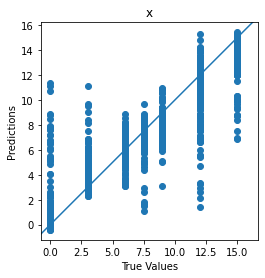

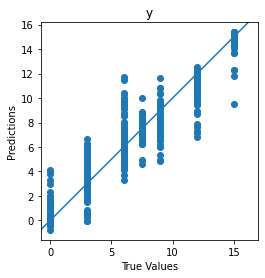

In [51]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

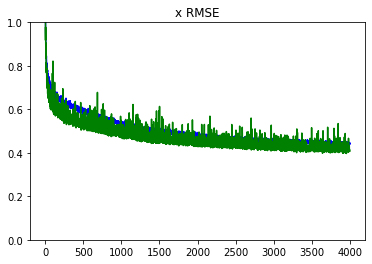

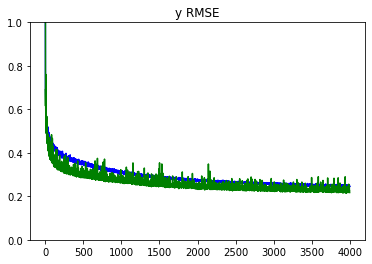

In [52]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [53]:
# Save model
model.save('./xyForcePlateN7/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlateN7/assets


In [ ]:
# Restore model
loaded_model = tf.keras.models.load_model('./xyForcePlate6/')

In [ ]:
dataVal.iloc[:,:4].shape

In [ ]:
# Run predict with restored model
predictions = loaded_model.predict(dataVal.iloc[:,:4])
x_pred = predictions[0]
y_pred = predictions[1]

In [ ]:
norm_test_X.shape

In [ ]:
norm_test_X[0]

In [ ]:
print(x_pred)

In [ ]:
print(dataVal.iloc[:,:4])

################################################################################